Carregando o dataset

In [1]:
import os
import pandas as pd
import numpy as np

dataset = pd.read_pickle(r'C:\Users\mathe\OneDrive\Área de Trabalho\SoccerIA\MathIA_v7\dataset_173cols_europeu.pkl')
dataset['season'] = dataset['season'].astype('float64')
nan_counts = dataset.isna().sum()
nan_tot = nan_counts.sum()
print(nan_tot)
print(dataset.shape)

0
(66840, 173)


In [2]:
import pandas as pd
import numpy as np

# 1-5. As features que já discutimos anteriormente
dataset['team1_GCR'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_corners_lasts5_1_home'] + 1)
dataset['team2_GCR'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_corners_lasts5_2_away'] + 1)

dataset['team1_CM'] = dataset['avg_corners_lasts5_1_home'] - dataset['avg_corners_lasts5_1_away'] 
dataset['team2_CM'] = dataset['avg_corners_lasts5_2_home'] - dataset['avg_corners_lasts5_2_away'] 


dataset['team1_ADCR'] = dataset['avg_corners_lasts5_1_home'] / (dataset['avg_corners_conc_lasts5_1_home'] + 1)
dataset['team2_ADCR'] = dataset['avg_corners_lasts5_2_away'] / (dataset['avg_corners_conc_lasts5_2_away'] + 1)

dataset['team1_CCR'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_total_shots_lasts5_1_home'] + 1)
dataset['team2_CCR'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_total_shots_lasts5_2_away'] + 1)

dataset['team1_corner_defense'] = dataset['avg_corners_lasts5_1_home'] / (dataset['avg_corners_conc_lasts5_1_home'] + 1)
dataset['team2_corner_defense'] = dataset['avg_corners_lasts5_2_away'] / (dataset['avg_corners_conc_lasts5_2_away'] + 1)

dataset['team1_attack_defense_ratio'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_conc_lasts5_1_home'] + 1)
dataset['team2_attack_defense_ratio'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_conc_lasts5_2_away'] + 1)

dataset['team1_corner_attack_ratio'] = dataset['avg_corners_lasts5_1_home'] / (dataset['avg_scr_lasts5_1_home'] + 1)
dataset['team2_corner_attack_ratio'] = dataset['avg_corners_lasts5_2_away'] / (dataset['avg_scr_lasts5_2_away'] + 1)

dataset['team1_effective_attack'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_total_shots_lasts5_1_home'] + 1)
dataset['team2_effective_attack'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_total_shots_lasts5_2_away'] + 1)

dataset['team1_effective_defense'] = dataset['avg_conc_lasts5_1_home'] / (dataset['avg_conc_total_shots_lasts5_1_home'] + 1)
dataset['team2_effective_defense'] = dataset['avg_conc_lasts5_2_away'] / (dataset['avg_conc_total_shots_lasts5_2_away'] + 1)

dataset['team1_corner_success'] = dataset['avg_corners_lasts5_1_home'] / (dataset['avg_total_shots_lasts5_1_home'] + 1)
dataset['team2_corner_success'] = dataset['avg_corners_lasts5_2_away'] / (dataset['avg_total_shots_lasts5_2_away'] + 1)


dataset['team1_corner_conversion'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_corners_lasts5_1_home'] + 1)
dataset['team2_corner_conversion'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_corners_lasts5_2_away'] + 1)

dataset['team1_corner_resilience'] = dataset['avg_corners_lasts5_1_home'] / (dataset['avg_conc_lasts5_1_home'] + 1)
dataset['team2_corner_resilience'] = dataset['avg_corners_lasts5_2_away'] / (dataset['avg_conc_lasts5_2_away'] + 1)

C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1194079787.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['team1_GCR'] = dataset['avg_scr_lasts5_1_home'] / (dataset['avg_corners_lasts5_1_home'] + 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1194079787.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['team2_GCR'] = dataset['avg_scr_lasts5_2_away'] / (dataset['avg_corners_lasts5_2_away'] + 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1194079787.py:8: PerformanceWarning: DataFrame is highly fr

Importando os dataframes de 2023

In [3]:
import os
import pandas as pd
import numpy as np

# Caminho para a pasta que contém os arquivos .xlsx de 2023
path = r'C:\Users\mathe\OneDrive\Área de Trabalho\SoccerIA\Planilhas2023'

# Dicionário para armazenar os dataframes
dataframes = {}
dfss = []
# Lista todos os arquivos na pasta
files = os.listdir(path)

# Filtra a lista de arquivos para incluir apenas os arquivos .xlsx
xlsx_files = [f for f in files if f.endswith('.xlsx')]

# Carrega cada arquivo .xlsx em um dataframe e armazena no dicionário
for file in xlsx_files:
    full_path = os.path.join(path, file)  # junta o caminho do diretório com o nome do arquivo
    dataframes[file] = pd.read_excel(full_path)  # lê o arquivo .xlsx do caminho completo

    if "Unnamed: 0" in dataframes[file].columns:
        dataframes[file].drop("Unnamed: 0", axis=1, inplace=True)

    if "match_report_url" in dataframes[file].columns:
        dataframes[file].drop("match_report_url", axis=1, inplace=True)    

    if "team1_yellow_cards" in dataframes[file].columns:
        dataframes[file].drop("team1_yellow_cards", axis=1, inplace=True)

    if "team2_yellow_cards" in dataframes[file].columns:
        dataframes[file].drop("team2_yellow_cards", axis=1, inplace=True)  
    dfss.append(dataframes[file])

    print(file)
    print(dataframes[file].shape)
    nan_counts = dataframes[file].isna().sum()
    print(nan_counts)


# Combine all the DataFrames into a single DataFrame
combined_df_2023 = pd.concat(dfss, ignore_index=True)

combined_df_2023['season'] = combined_df_2023['season'].astype('float64')
combined_df_2023['team1'] = combined_df_2023['team1'].str.lower()
combined_df_2023['team2'] = combined_df_2023['team2'].str.lower()
combined_df_2023.replace('', np.nan, inplace=True)
# Add a column to mark future matches
combined_df_2023['is_future_match'] = combined_df_2023['team1_goals'].isna() | combined_df_2023['team2_goals'].isna()
combined_df_2023['season'] = '2023'
# Replace empty string with NaN
combined_df_2023["team1_red_cards"].replace('', np.nan, inplace=True)
combined_df_2023["team2_red_cards"].replace('', np.nan, inplace=True)

# Replace NaN with 0
combined_df_2023["team1_red_cards"].fillna(0, inplace=True)
combined_df_2023["team2_red_cards"].fillna(0, inplace=True)

combined_df_2023['date'] = pd.to_datetime(combined_df_2023['date'], format='%Y-%m-%d', errors='coerce')
combined_df_2023.sort_values('date', inplace=True)

print(combined_df_2023.columns)
print(combined_df_2023.shape) 


2023_ALE_A.xlsx
(126, 19)
team1                     0
team2                     0
team1_goals              63
team2_goals              63
season                    0
championship              0
team1_shots_on_target    63
team1_shots_out          63
team2_shots_on_target    63
team2_shots_out          63
team1_red_cards          63
team2_red_cards          63
team1_fouls              63
team2_fouls              63
team1_corners            63
team2_corners            63
team1_total_shots        63
team2_total_shots        63
date                      0
dtype: int64
2023_ALE_B.xlsx
(126, 19)
team1                     0
team2                     0
team1_goals              45
team2_goals              45
season                    0
championship              0
team1_shots_on_target    45
team1_shots_out          45
team2_shots_on_target    45
team2_shots_out          45
team1_red_cards          45
team2_red_cards          45
team1_fouls              45
team2_fouls              45
team1_corne

In [4]:
import pandas as pd
import numpy as np


combined_df_2023.sort_values('date', inplace=True)


combined_df_2023['team1_goals'] = pd.to_numeric(combined_df_2023['team1_goals'], errors='coerce')
combined_df_2023['team2_goals'] = pd.to_numeric(combined_df_2023['team2_goals'], errors='coerce')

# calculate goal differences
combined_df_2023['goal_diff_team1'] = combined_df_2023['team1_goals'] - combined_df_2023['team2_goals']
combined_df_2023['goal_diff_team2'] = combined_df_2023['team2_goals'] - combined_df_2023['team1_goals']

# calculate corners differences
combined_df_2023['corners_diff_team1'] = combined_df_2023['team1_corners'] - combined_df_2023['team2_corners']
combined_df_2023['corners_diff_team2'] = combined_df_2023['team2_corners'] - combined_df_2023['team1_corners']

# calculate big wins and losses
combined_df_2023['team1_big_win'] = np.where(combined_df_2023['goal_diff_team1'] >= 2, 1, 0)
combined_df_2023['team1_big_loss'] = np.where(combined_df_2023['goal_diff_team1'] <= -2, 1, 0)
combined_df_2023['team2_big_win'] = np.where(combined_df_2023['goal_diff_team2'] >= 2, 1, 0)
combined_df_2023['team2_big_loss'] = np.where(combined_df_2023['goal_diff_team2'] <= -2, 1, 0)

# calculate AH-2.5 win and losses
combined_df_2023['team1_ah-2.5_win'] = np.where(combined_df_2023['corners_diff_team1'] >= 3, 1, 0)
combined_df_2023['team1_ah-2.5_loss'] = np.where(combined_df_2023['corners_diff_team1'] <= 2, 1, 0)
combined_df_2023['team2_ah-2.5_win'] = np.where(combined_df_2023['corners_diff_team2'] >= 3, 1, 0)
combined_df_2023['team2_ah-2.5_loss'] = np.where(combined_df_2023['corners_diff_team2'] <= 2, 1, 0)


# calculate AH+2.5 win and losses
combined_df_2023['team1_ah+2.5_win'] = np.where(combined_df_2023['corners_diff_team1'] >= -2, 1, 0)
combined_df_2023['team1_ah+2.5_loss'] = np.where(combined_df_2023['corners_diff_team1'] <= -3, 1, 0)
combined_df_2023['team2_ah+2.5_win'] = np.where(combined_df_2023['corners_diff_team2'] >= -2, 1, 0)
combined_df_2023['team2_ah+2.5_loss'] = np.where(combined_df_2023['corners_diff_team2'] <= -3, 1, 0)


# calculate over4.5 win and losses
combined_df_2023['team1_over4.5'] = np.where(combined_df_2023['team1_corners'] >= 5, 1, 0)
combined_df_2023['team1_under4.5'] = np.where(combined_df_2023['team1_corners'] <= 4, 1, 0)
combined_df_2023['team2_over4.5'] = np.where(combined_df_2023['team2_corners'] >= 5, 1, 0)
combined_df_2023['team2_under4.5'] = np.where(combined_df_2023['team2_corners'] <= 4, 1, 0)

# calculate over3.5 win and losses
combined_df_2023['team1_over3.5'] = np.where(combined_df_2023['team1_corners'] >= 4, 1, 0)
combined_df_2023['team1_under3.5'] = np.where(combined_df_2023['team1_corners'] <= 3, 1, 0)
combined_df_2023['team2_over3.5'] = np.where(combined_df_2023['team2_corners'] >= 4, 1, 0)
combined_df_2023['team2_under3.5'] = np.where(combined_df_2023['team2_corners'] <= 3, 1, 0)

# calculate over6.5 win and losses
combined_df_2023['team1_over6.5'] = np.where(combined_df_2023['team1_corners'] >= 7, 1, 0)
combined_df_2023['team1_under6.5'] = np.where(combined_df_2023['team1_corners'] <= 6, 1, 0)
combined_df_2023['team2_over6.5'] = np.where(combined_df_2023['team2_corners'] >= 7, 1, 0)
combined_df_2023['team2_under6.5'] = np.where(combined_df_2023['team2_corners'] <= 6, 1, 0)



# Initialize these columns with 0
combined_df_2023['team1_big_wins_last5'] = 0
combined_df_2023['team1_big_losses_last5'] = 0
combined_df_2023['team2_big_wins_last5'] = 0
combined_df_2023['team2_big_losses_last5'] = 0

combined_df_2023['team1_ah-2.5_wins_last5'] = 0 
combined_df_2023['team1_ah-2.5_losses_last5'] = 0 
combined_df_2023['team2_ah-2.5_wins_last5'] = 0 
combined_df_2023['team2_ah-2.5_losses_last5'] = 0 

combined_df_2023['team1_ah+2.5_wins_last5'] = 0 
combined_df_2023['team1_ah+2.5_losses_last5'] = 0 
combined_df_2023['team2_ah+2.5_wins_last5'] = 0 
combined_df_2023['team2_ah+2.5_losses_last5'] = 0 

combined_df_2023['team1_over3.5_last5'] = 0 
combined_df_2023['team1_under3.5_last5'] = 0 
combined_df_2023['team2_over3.5_last5'] = 0 
combined_df_2023['team2_under3.5_last5'] = 0 

combined_df_2023['team1_over4.5_last5'] = 0 
combined_df_2023['team1_under4.5_last5'] = 0 
combined_df_2023['team2_over4.5_last5'] = 0
combined_df_2023['team2_under4.5_last5'] = 0

combined_df_2023['team1_over6.5_last5'] = 0
combined_df_2023['team1_under6.5_last5'] = 0
combined_df_2023['team2_over6.5_last5'] = 0
combined_df_2023['team2_under6.5_last5'] = 0


new_cols = ['avg_scr_lasts3_1_home', 'avg_scr_lasts5_1_home', 'avg_scr_lasts3_1_away',
            'avg_scr_lasts5_1_away', 'avg_conc_lasts3_1_home', 'avg_conc_lasts5_1_home',
            'avg_conc_lasts3_1_away', 'avg_conc_lasts5_1_away', 'avg_scr_lasts3_2_home',
            'avg_scr_lasts5_2_home', 'avg_scr_lasts3_2_away', 'avg_scr_lasts5_2_away',
            'avg_conc_lasts3_2_home', 'avg_conc_lasts5_2_home', 'avg_conc_lasts3_2_away',
            'avg_conc_lasts5_2_away','team1_big_wins_last5', 'team1_big_losses_last5', 
            'team2_big_wins_last5', 'team2_big_losses_last5',
            #abaixo vai ser baseado em finalizações
            'avg_total_shots_lasts5_1_home','avg_total_shots_lasts5_1_away','avg_total_shots_lasts5_2_home',
            'avg_total_shots_lasts5_2_away', 'avg_otarget_shots_lasts5_1_home','avg_otarget_shots_lasts5_1_away',
            'avg_otarget_shots_lasts5_2_home','avg_otarget_shots_lasts5_2_away','avg_out_shots_lasts5_1_home',
            'avg_out_shots_lasts5_1_away','avg_out_shots_lasts5_2_home','avg_out_shots_lasts5_2_away',
            'avg_conc_total_shots_lasts5_1_home','avg_conc_total_shots_lasts5_1_away',
            'avg_conc_total_shots_lasts5_2_home','avg_conc_total_shots_lasts5_2_away',
            #abaixo vai ser baseado em corners
            'avg_corners_lasts5_1_home','avg_corners_lasts5_1_away', 
            'avg_corners_conc_lasts5_1_home','avg_corners_conc_lasts5_1_away',
            'avg_corners_lasts5_2_home','avg_corners_lasts5_2_away', 
            'avg_corners_conc_lasts5_2_home', 'avg_corners_conc_lasts5_2_away',
            #abaixo vai ser baseado em fouls
            'avg_fouls_lasts5_1_home','avg_fouls_lasts5_1_away', 
            'avg_fouls_conc_lasts5_1_home', 'avg_fouls_conc_lasts5_1_away',
            'avg_fouls_lasts5_2_home','avg_fouls_lasts5_2_away', 
            'avg_fouls_conc_lasts5_2_home', 'avg_fouls_conc_lasts5_2_away',
            #novas colunas da v7
            'team1_ah-2.5_wins_last5', 'team1_ah-2.5_losses_last5','team2_ah-2.5_wins_last5','team2_ah-2.5_losses_last5',
            'team1_ah+2.5_wins_last5','team1_ah+2.5_losses_last5','team2_ah+2.5_wins_last5','team2_ah+2.5_losses_last5',
            'team1_over3.5_last5','team1_under3.5_last5','team2_over3.5_last5','team2_under3.5_last5',
            'team1_over4.5_last5','team1_under4.5_last5','team2_over4.5_last5','team2_under4.5_last5',
            'team1_over6.5_last5','team1_under6.5_last5','team2_over6.5_last5','team2_under6.5_last5',
            #v8
            'avg_corners_diff_lasts5_1_home', 'median_corners_diff_lasts5_1_home', 'avg_corners_diff_lasts5_1_away',
             'median_corners_diff_lasts5_1_away', 'avg_corners_diff_lasts5_2_home','median_corners_diff_lasts5_2_home', 
             'avg_corners_diff_lasts5_2_away','median_corners_diff_lasts5_2_away'
            ]

# Create a dictionary with keys as column names and values as np.nan
new_cols_dict = {col: np.nan for col in new_cols}

# Add new columns to the DataFrame
combined_df_2023 = combined_df_2023.assign(**new_cols_dict)

#ESTATÍSTICAS PARA O TIME, LEVANDO EM CONSIDERAÇÃO CASA E FORA, PORÉM É UMA ESTATÍSTICA ÚNICA PARA O CONFRONTRO
# Iterate over each row in the DataFrame
for i, row in combined_df_2023.iterrows():
    # For each team, get their past home and away matches before the current date
    team1_matches = combined_df_2023[((combined_df_2023['team1'] == row['team1']) | (combined_df_2023['team2'] == row['team1'])) & (combined_df_2023['date'] < row['date']) & (combined_df_2023['season'] == row['season'])].sort_values(by='date')
    team2_matches = combined_df_2023[((combined_df_2023['team1'] == row['team2']) | (combined_df_2023['team2'] == row['team2'])) & (combined_df_2023['date'] < row['date']) & (combined_df_2023['season'] == row['season'])].sort_values(by='date')

    # For each team, calculate stats for last 5 matches
    if not team1_matches.empty:
        team1_matches['big_win'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_big_win'], team1_matches['team2_big_win'])
        team1_matches['big_loss'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_big_loss'], team1_matches['team2_big_loss'])
        combined_df_2023.at[i, 'team1_big_wins_last5'] = team1_matches['big_win'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_big_losses_last5'] = team1_matches['big_loss'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan

        # Para ah-2.5 para a equipe 1
        team1_matches['ah-2.5_win'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_ah-2.5_win'], team1_matches['team2_ah-2.5_win'])
        team1_matches['ah-2.5_loss'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_ah-2.5_loss'], team1_matches['team2_ah-2.5_loss'])
        combined_df_2023.at[i, 'team1_ah-2.5_wins_last5'] = team1_matches['ah-2.5_win'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_ah-2.5_losses_last5'] = team1_matches['ah-2.5_loss'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan

        # Para ah+2.5 para a equipe 1
        team1_matches['ah+2.5_win'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_ah+2.5_win'], team1_matches['team2_ah+2.5_win'])
        team1_matches['ah+2.5_loss'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_ah+2.5_loss'], team1_matches['team2_ah+2.5_loss'])
        combined_df_2023.at[i, 'team1_ah+2.5_wins_last5'] = team1_matches['ah+2.5_win'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_ah+2.5_losses_last5'] = team1_matches['ah+2.5_loss'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan

        # Para over3.5 para a equipe 1
        team1_matches['over3.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_over3.5'], team1_matches['team2_over3.5'])
        team1_matches['under3.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_under3.5'], team1_matches['team2_under3.5'])
        combined_df_2023.at[i, 'team1_over3.5_last5'] = team1_matches['over3.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_under3.5_last5'] = team1_matches['under3.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan

        # Para over4.5 para a equipe 1
        team1_matches['over4.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_over4.5'], team1_matches['team2_over4.5'])
        team1_matches['under4.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_under4.5'], team1_matches['team2_under4.5'])
        combined_df_2023.at[i, 'team1_over4.5_last5'] = team1_matches['over4.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_under4.5_last5'] = team1_matches['under4.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan

        # Para over6.5 para a equipe 1
        team1_matches['over6.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_over6.5'], team1_matches['team2_over6.5'])
        team1_matches['under6.5'] = np.where(team1_matches['team1'] == row['team1'], team1_matches['team1_under6.5'], team1_matches['team2_under6.5'])
        combined_df_2023.at[i, 'team1_over6.5_last5'] = team1_matches['over6.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team1_under6.5_last5'] = team1_matches['under6.5'].rolling(5).sum().iloc[-1] if len(team1_matches) >= 2 else np.nan



    if not team2_matches.empty:
        team2_matches['big_win'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_big_win'], team2_matches['team2_big_win'])
        team2_matches['big_loss'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_big_loss'], team2_matches['team2_big_loss'])
        combined_df_2023.at[i, 'team2_big_wins_last5'] = team2_matches['big_win'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_big_losses_last5'] = team2_matches['big_loss'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan

        # Para ah-2.5 para a equipe 2
        team2_matches['ah-2.5_win'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_ah-2.5_win'], team2_matches['team2_ah-2.5_win'])
        team2_matches['ah-2.5_loss'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_ah-2.5_loss'], team2_matches['team2_ah-2.5_loss'])
        combined_df_2023.at[i, 'team2_ah-2.5_wins_last5'] = team2_matches['ah-2.5_win'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_ah-2.5_losses_last5'] = team2_matches['ah-2.5_loss'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan

        # Para ah+2.5 para a equipe 2
        team2_matches['ah+2.5_win'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_ah+2.5_win'], team2_matches['team2_ah+2.5_win'])
        team2_matches['ah+2.5_loss'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_ah+2.5_loss'], team2_matches['team2_ah+2.5_loss'])
        combined_df_2023.at[i, 'team2_ah+2.5_wins_last5'] = team2_matches['ah+2.5_win'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_ah+2.5_losses_last5'] = team2_matches['ah+2.5_loss'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan

        # Para over3.5  para a equipe 2
        team2_matches['over3.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_over3.5'], team2_matches['team2_over3.5'])
        team2_matches['under3.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_under3.5'], team2_matches['team2_under3.5'])
        combined_df_2023.at[i, 'team2_over3.5_last5'] = team2_matches['over3.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_under3.5_last5'] = team2_matches['under3.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan

        # Para over4.5  para a equipe 2
        team2_matches['over4.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_over4.5'], team2_matches['team2_over4.5'])
        team2_matches['under4.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_under4.5'], team2_matches['team2_under4.5'])
        combined_df_2023.at[i, 'team2_over4.5_last5'] = team2_matches['over4.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_under4.5_last5'] = team2_matches['under4.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan

        # Para over6.5  para a equipe 2
        team2_matches['over6.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_over6.5'], team2_matches['team2_over6.5'])
        team2_matches['under6.5'] = np.where(team2_matches['team1'] == row['team2'], team2_matches['team1_under6.5'], team2_matches['team2_under6.5'])
        combined_df_2023.at[i, 'team2_over6.5_last5'] = team2_matches['over6.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan
        combined_df_2023.at[i, 'team2_under6.5_last5'] = team2_matches['under6.5'].rolling(5).sum().iloc[-1] if len(team2_matches) >= 2 else np.nan



 
#ESTATÍSTICAS PARA O TIME, LEVANDO EM CONSIDERAÇÃO CASA E FORA SEPARADAMENTE 
for i, row in combined_df_2023.iterrows():
    team1_home = combined_df_2023[(combined_df_2023['date'] < row['date']) & (combined_df_2023['team1'] == row['team1']) & (combined_df_2023['season'] == row['season'])]
    team1_away = combined_df_2023[(combined_df_2023['date'] < row['date']) & (combined_df_2023['team2'] == row['team1']) & (combined_df_2023['season'] == row['season'])]
    
    team2_home = combined_df_2023[(combined_df_2023['date'] < row['date']) & (combined_df_2023['team1'] == row['team2']) & (combined_df_2023['season'] == row['season'])]
    team2_away = combined_df_2023[(combined_df_2023['date'] < row['date']) & (combined_df_2023['team2'] == row['team2']) & (combined_df_2023['season'] == row['season'])]

    if not team1_home.empty:
        combined_df_2023.at[i, 'avg_scr_lasts3_1_home'] = team1_home['team1_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team1_home['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_scr_lasts5_1_home'] = team1_home['team1_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts3_1_home'] = team1_home['team2_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team1_home['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts5_1_home'] = team1_home['team2_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team2_goals'].isna().any() else np.nan
        ####################################### ABAIXO É SOBRE FINALIZAÇÕES ###########################################
        combined_df_2023.at[i, 'avg_total_shots_lasts5_1_home'] = team1_home['team1_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_total_shots_lasts5_1_home'] = team1_home['team2_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team2_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_otarget_shots_lasts5_1_home'] = team1_home['team1_shots_on_target'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_shots_on_target'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_out_shots_lasts5_1_home'] = team1_home['team1_shots_out'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_shots_out'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE CORNERS ##########################################
        combined_df_2023.at[i, 'avg_corners_lasts5_1_home'] = team1_home['team1_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_corners_conc_lasts5_1_home'] = team1_home['team2_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team2_corners'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE FOULS ##########################################
        combined_df_2023.at[i, 'avg_fouls_lasts5_1_home'] = team1_home['team1_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team1_fouls'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_fouls_conc_lasts5_1_home'] = team1_home['team2_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['team2_fouls'].isna().any() else np.nan
       
        # Mediana e Desvio Padrão para Finalizações (Shots)
        combined_df_2023.at[i, 'median_total_shots_lasts5_1_home'] = team1_home['team1_total_shots'].rolling(5, min_periods=2).median().iloc[-1] if not team1_home['team1_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_total_shots_lasts5_1_home'] = team1_home['team1_total_shots'].rolling(5, min_periods=2).std().iloc[-1] if not team1_home['team1_total_shots'].isna().any() else np.nan
        
        # Mediana e Desvio Padrão para Corners
        combined_df_2023.at[i, 'median_corners_lasts5_1_home'] = team1_home['team1_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team1_home['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_corners_lasts5_1_home'] = team1_home['team1_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team1_home['team1_corners'].isna().any() else np.nan

        # Mediana e Desvio Padrão para Corners Concedidos
        combined_df_2023.at[i, 'median_conc_corners_lasts5_1_home'] = team1_home['team2_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team1_home['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_conc_corners_lasts5_1_home'] = team1_home['team2_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team1_home['team2_corners'].isna().any() else np.nan
        
        
        # Média e Mediana do saldo da diferença de escanteios para o time 1 nas últimas 5 partidas em casa
        combined_df_2023.at[i, 'avg_corners_diff_lasts5_1_home'] = team1_home['corners_diff_team1'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_home['corners_diff_team1'].isna().any() else np.nan
        combined_df_2023.at[i, 'median_corners_diff_lasts5_1_home'] = team1_home['corners_diff_team1'].rolling(5, min_periods=2).median().iloc[-1] if not team1_home['corners_diff_team1'].isna().any() else np.nan




    if not team1_away.empty:
        combined_df_2023.at[i, 'avg_scr_lasts3_1_away'] = team1_away['team2_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team1_away['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_scr_lasts5_1_away'] = team1_away['team2_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts3_1_away'] = team1_away['team1_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team1_away['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts5_1_away'] = team1_away['team1_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team1_goals'].isna().any() else np.nan
        ####################################### ABAIXO É SOBRE FINALIZAÇÕES ###########################################
        combined_df_2023.at[i, 'avg_total_shots_lasts5_1_away'] = team1_away['team2_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_otarget_shots_lasts5_1_away'] = team1_away['team2_shots_on_target'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_shots_on_target'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_out_shots_lasts5_1_away'] = team1_away['team2_shots_out'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_shots_out'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_total_shots_lasts5_1_away'] = team1_away['team1_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team1_total_shots'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE CORNERS ##########################################
        combined_df_2023.at[i, 'avg_corners_lasts5_1_away'] = team1_away['team2_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_corners_conc_lasts5_1_away'] = team1_away['team1_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team1_corners'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE FOULS ##########################################
        combined_df_2023.at[i, 'avg_fouls_lasts5_1_away'] = team1_away['team2_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team2_fouls'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_fouls_conc_lasts5_1_away'] = team1_away['team1_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['team1_fouls'].isna().any() else np.nan


        # Mediana e Desvio Padrão para Finalizações (Shots)
        combined_df_2023.at[i, 'median_total_shots_lasts5_1_away'] = team1_away['team2_total_shots'].rolling(5, min_periods=2).median().iloc[-1] if not team1_away['team2_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_total_shots_lasts5_1_away'] = team1_away['team2_total_shots'].rolling(5, min_periods=2).std().iloc[-1] if not team1_away['team2_total_shots'].isna().any() else np.nan
        
        # Mediana e Desvio Padrão para Corners
        combined_df_2023.at[i, 'median_corners_lasts5_1_away'] = team1_away['team2_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team1_away['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_corners_lasts5_1_away'] = team1_away['team2_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team1_away['team2_corners'].isna().any() else np.nan
    
        # Mediana e Desvio Padrão para Corners Concedidos
        combined_df_2023.at[i, 'median_conc_corners_lasts5_1_away'] = team1_away['team1_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team1_away['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_conc_corners_lasts5_1_away'] = team1_away['team1_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team1_away['team1_corners'].isna().any() else np.nan


        # Média e Mediana do saldo da diferença de escanteios para o time 1 nas últimas 5 partidas fora de casa
        combined_df_2023.at[i, 'avg_corners_diff_lasts5_1_away'] = team1_away['corners_diff_team2'].rolling(5, min_periods=2).mean().iloc[-1] if not team1_away['corners_diff_team2'].isna().any() else np.nan
        combined_df_2023.at[i, 'median_corners_diff_lasts5_1_away'] = team1_away['corners_diff_team2'].rolling(5, min_periods=2).median().iloc[-1] if not team1_away['corners_diff_team2'].isna().any() else np.nan


    if not team2_home.empty:
        combined_df_2023.at[i, 'avg_scr_lasts3_2_home'] = team2_home['team1_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team2_home['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_scr_lasts5_2_home'] = team2_home['team1_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts3_2_home'] = team2_home['team2_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team2_home['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts5_2_home'] = team2_home['team2_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team2_goals'].isna().any() else np.nan
        ####################################### ABAIXO É SOBRE FINALIZAÇÕES ###########################################
        combined_df_2023.at[i, 'avg_total_shots_lasts5_2_home'] = team2_home['team1_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_otarget_shots_lasts5_2_home'] = team2_home['team1_shots_on_target'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_shots_on_target'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_out_shots_lasts5_2_home'] = team2_home['team1_shots_out'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_shots_out'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_total_shots_lasts5_2_home'] = team2_home['team2_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team2_total_shots'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE CORNERS ##########################################
        combined_df_2023.at[i, 'avg_corners_lasts5_2_home'] = team2_home['team1_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_corners_conc_lasts5_2_home'] = team2_home['team2_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team2_corners'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE FOULS ##########################################
        combined_df_2023.at[i, 'avg_fouls_lasts5_2_home'] = team2_home['team1_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team1_fouls'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_fouls_conc_lasts5_2_home'] = team2_home['team2_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['team2_fouls'].isna().any() else np.nan

        # Mediana e Desvio Padrão para Finalizações (Shots)
        combined_df_2023.at[i, 'median_total_shots_lasts5_2_home'] = team2_home['team1_total_shots'].rolling(5, min_periods=2).median().iloc[-1] if not team2_home['team1_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_total_shots_lasts5_2_home'] = team2_home['team1_total_shots'].rolling(5, min_periods=2).std().iloc[-1] if not team2_home['team1_total_shots'].isna().any() else np.nan
        
        # Mediana e Desvio Padrão para Corners
        combined_df_2023.at[i, 'median_corners_lasts5_2_home'] = team2_home['team1_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team2_home['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_corners_lasts5_2_home'] = team2_home['team1_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team2_home['team1_corners'].isna().any() else np.nan

        # Mediana e Desvio Padrão para Corners Concedidos
        combined_df_2023.at[i, 'median_conc_corners_lasts5_2_home'] = team2_home['team2_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team2_home['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_conc_corners_lasts5_2_home'] = team2_home['team2_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team2_home['team2_corners'].isna().any() else np.nan


        # Média e Mediana do saldo da diferença de escanteios para o time 2 nas últimas 5 partidas em casa
        combined_df_2023.at[i, 'avg_corners_diff_lasts5_2_home'] = team2_home['corners_diff_team2'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_home['corners_diff_team2'].isna().any() else np.nan
        combined_df_2023.at[i, 'median_corners_diff_lasts5_2_home'] = team2_home['corners_diff_team2'].rolling(5, min_periods=2).median().iloc[-1] if not team2_home['corners_diff_team2'].isna().any() else np.nan

    if not team2_away.empty:
        combined_df_2023.at[i, 'avg_scr_lasts3_2_away'] = team2_away['team2_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team2_away['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_scr_lasts5_2_away'] = team2_away['team2_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts3_2_away'] = team2_away['team1_goals'].rolling(3, min_periods=2).mean().iloc[-1] if not team2_away['team1_goals'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_lasts5_2_away'] = team2_away['team1_goals'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team1_goals'].isna().any() else np.nan
        ####################################### ABAIXO É SOBRE FINALIZAÇÕES ###########################################
        combined_df_2023.at[i, 'avg_total_shots_lasts5_2_away'] = team2_away['team2_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_otarget_shots_lasts5_2_away'] = team2_away['team2_shots_on_target'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_shots_on_target'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_out_shots_lasts5_2_away'] = team2_away['team2_shots_out'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_shots_out'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_conc_total_shots_lasts5_2_away'] = team2_away['team1_total_shots'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team1_total_shots'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE CORNERS ##########################################
        combined_df_2023.at[i, 'avg_corners_lasts5_2_away'] = team2_away['team2_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_corners_conc_lasts5_2_away'] = team2_away['team1_corners'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team1_corners'].isna().any() else np.nan
        ########################################## ABAIXO É SOBRE FOULS ##########################################
        combined_df_2023.at[i, 'avg_fouls_lasts5_2_away'] = team2_away['team2_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team2_fouls'].isna().any() else np.nan
        combined_df_2023.at[i, 'avg_fouls_conc_lasts5_2_away'] = team2_away['team1_fouls'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['team1_fouls'].isna().any() else np.nan
        

        # Mediana e Desvio Padrão para Finalizações (Shots)
        combined_df_2023.at[i, 'median_total_shots_lasts5_2_away'] = team2_away['team2_total_shots'].rolling(5, min_periods=2).median().iloc[-1] if not team2_away['team2_total_shots'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_total_shots_lasts5_2_away'] = team2_away['team2_total_shots'].rolling(5, min_periods=2).std().iloc[-1] if not team2_away['team2_total_shots'].isna().any() else np.nan
        
        # Mediana e Desvio Padrão para Corners
        combined_df_2023.at[i, 'median_corners_lasts5_2_away'] = team2_away['team2_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team2_away['team2_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_corners_lasts5_2_away'] = team2_away['team2_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team2_away['team2_corners'].isna().any() else np.nan

        # Mediana e Desvio Padrão para Corners Concedidos
        combined_df_2023.at[i, 'median_conc_corners_lasts5_2_away'] = team2_away['team1_corners'].rolling(5, min_periods=2).median().iloc[-1] if not team2_away['team1_corners'].isna().any() else np.nan
        combined_df_2023.at[i, 'std_conc_corners_lasts5_2_away'] = team2_away['team1_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team2_away['team1_corners'].isna().any() else np.nan


        # Média e Mediana do saldo da diferença de escanteios para o time 2 nas últimas 5 partidas fora de casa
        combined_df_2023.at[i, 'avg_corners_diff_lasts5_2_away'] = team2_away['corners_diff_team2'].rolling(5, min_periods=2).mean().iloc[-1] if not team2_away['corners_diff_team2'].isna().any() else np.nan
        combined_df_2023.at[i, 'median_corners_diff_lasts5_2_away'] = team2_away['corners_diff_team2'].rolling(5, min_periods=2).median().iloc[-1] if not team2_away['corners_diff_team2'].isna().any() else np.nan


combined_df_2023.shape        

C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1722247661.py:249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023.at[i, 'std_corners_lasts5_1_home'] = team1_home['team1_corners'].rolling(5, min_periods=2).std().iloc[-1] if not team1_home['team1_corners'].isna().any() else np.nan
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1722247661.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023.at[i, 'median_conc_corners_lasts5_1_home'] = team1_home['team2_corners'].rolling(5, min_periods=2).median(

(2662, 152)

In [5]:
def get_result(row):
    if row['team1_goals'] > row['team2_goals']:
        return pd.Series([3, 0])
    elif row['team1_goals'] < row['team2_goals']:
        return pd.Series([0, 3])
    else:
        return pd.Series([1, 1])

combined_df_2023[['result_team1', 'result_team2']] = combined_df_2023.apply(get_result, axis=1)

def get_streak(df, result_col, results):
    result_series = df[result_col].apply(lambda x: 1 if x in results else 0)
    result_series = result_series * (result_series.groupby((result_series != result_series.shift()).cumsum()).cumcount() + 1)
    return result_series

# Create a dictionary to hold individual team dataframes
team_df_dict = {}

def get_individual_team_df(df, team_name): #teoricamente aqui deveria ser corners, mas o erro se apresentou menor assim:
    if team_name in team_df_dict:
        return team_df_dict[team_name]
        
    team_games = df[(df['team1'] == team_name) | (df['team2'] == team_name)].copy()
    team_games['team_is_team1'] = team_games['team1'] == team_name
    team_games['team_result'] = np.where(team_games['team_is_team1'], team_games['result_team1'], team_games['result_team2'])
    team_games['team_goals'] = np.where(team_games['team_is_team1'], team_games['team1_goals'], team_games['team2_goals'])
    team_games['team_redcards'] = np.where(team_games['team_is_team1'], team_games['team1_red_cards'], team_games['team2_red_cards'])

    team_games.sort_values('date', inplace=True)
    team_games['days_since_last_game'] = team_games['date'].diff().dt.days

    team_df_dict[team_name] = team_games
    return team_games

def get_team_stats(row, df):
    team1_games = get_individual_team_df(df, row['team1'])
    team2_games = get_individual_team_df(df, row['team2'])

    # Filter to include only games that occurred before the current game
    team1_games = team1_games[team1_games['date'] < row['date']]
    team2_games = team2_games[team2_games['date'] < row['date']]

    stats = {}

    if not team1_games.empty:
        stats['team1_winning_streak'] = get_streak(team1_games, 'team_result', [3]).iloc[-1]
        stats['team1_undefeated_streak'] = get_streak(team1_games, 'team_result', [1, 3]).iloc[-1]
        stats['team1_losing_streak'] = get_streak(team1_games, 'team_result', [0]).iloc[-1]
        stats['team1_without_winning_streak'] = get_streak(team1_games, 'team_result', [0, 1]).iloc[-1]
        stats['avg_points_lasts5_1'] = team1_games.tail(5)['team_result'].mean()
        stats['team1_strength'] = team1_games['team_goals'].sum() / (team1_games['team1_goals'].sum() + team1_games['team2_goals'].sum() + 0.01)
        stats['championship_points_1'] = team1_games['team_result'].sum() / len(team1_games)
        rested_4_or_more_days_1 = team1_games.tail(1)['days_since_last_game'].values[0] >= 4
        stats['rested_4_days_or_more_1'] = 1 if rested_4_or_more_days_1 else -1

    if not team2_games.empty:
        stats['team2_winning_streak'] = get_streak(team2_games, 'team_result', [3]).iloc[-1]
        stats['team2_undefeated_streak'] = get_streak(team2_games, 'team_result', [1, 3]).iloc[-1]
        stats['team2_losing_streak'] = get_streak(team2_games, 'team_result', [0]).iloc[-1]
        stats['team2_without_winning_streak'] = get_streak(team2_games, 'team_result', [0, 1]).iloc[-1]
        stats['avg_points_lasts5_2'] = team2_games.tail(5)['team_result'].mean()
        stats['team2_strength'] = team2_games['team_goals'].sum() / (team2_games['team1_goals'].sum() + team2_games['team2_goals'].sum() + 0.01)
        stats['championship_points_2'] = team2_games['team_result'].sum() / len(team2_games)
        rested_4_or_more_days_2 = team2_games.tail(1)['days_since_last_game'].values[0] >= 4
        stats['rested_4_days_or_more_2'] = 1 if rested_4_or_more_days_2 else -1

    return pd.Series(stats)

combined_df_2023 = pd.concat([combined_df_2023, combined_df_2023.apply(lambda row: get_team_stats(row, combined_df_2023), axis=1)], axis=1)

# Now, calculate the number of suspended players for the next match for each team.
for team_name in team_df_dict.keys():
    team_df = team_df_dict[team_name].copy()
    team_df['next_match_suspended_players'] = team_df['team_redcards'].shift()

    # Assign the suspended players back to the combined_df_2023.
    team1_mask = combined_df_2023['team1'] == team_name
    team2_mask = combined_df_2023['team2'] == team_name
    combined_df_2023.loc[team1_mask, 'team1_suspended_players'] = team_df.loc[team1_mask, 'next_match_suspended_players']
    combined_df_2023.loc[team2_mask, 'team2_suspended_players'] = team_df.loc[team2_mask, 'next_match_suspended_players']

combined_df_2023.shape    


C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1439903165.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023[['result_team1', 'result_team2']] = combined_df_2023.apply(get_result, axis=1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1439903165.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023[['result_team1', 'result_team2']] = combined_df_2023.apply(get_result, axis=1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\1439903165.py:79: PerformanceWarning: DataFrame is highly fragmented.

(2662, 172)

In [6]:
import pandas as pd
import numpy as np

# 1-5. As features que já discutimos anteriormente
combined_df_2023['team1_GCR'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_corners_lasts5_1_home'] + 1)
combined_df_2023['team2_GCR'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_corners_lasts5_2_away'] + 1)

combined_df_2023['team1_CM'] = combined_df_2023['avg_corners_lasts5_1_home'] - combined_df_2023['avg_corners_lasts5_1_away'] 
combined_df_2023['team2_CM'] = combined_df_2023['avg_corners_lasts5_2_home'] - combined_df_2023['avg_corners_lasts5_2_away'] 


combined_df_2023['team1_ADCR'] = combined_df_2023['avg_corners_lasts5_1_home'] / (combined_df_2023['avg_corners_conc_lasts5_1_home'] + 1)
combined_df_2023['team2_ADCR'] = combined_df_2023['avg_corners_lasts5_2_away'] / (combined_df_2023['avg_corners_conc_lasts5_2_away'] + 1)

combined_df_2023['team1_CCR'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_total_shots_lasts5_1_home'] + 1)
combined_df_2023['team2_CCR'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_total_shots_lasts5_2_away'] + 1)

combined_df_2023['team1_corner_defense'] = combined_df_2023['avg_corners_lasts5_1_home'] / (combined_df_2023['avg_corners_conc_lasts5_1_home'] + 1)
combined_df_2023['team2_corner_defense'] = combined_df_2023['avg_corners_lasts5_2_away'] / (combined_df_2023['avg_corners_conc_lasts5_2_away'] + 1)

combined_df_2023['team1_attack_defense_ratio'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_conc_lasts5_1_home'] + 1)
combined_df_2023['team2_attack_defense_ratio'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_conc_lasts5_2_away'] + 1)

combined_df_2023['team1_corner_attack_ratio'] = combined_df_2023['avg_corners_lasts5_1_home'] / (combined_df_2023['avg_scr_lasts5_1_home'] + 1)
combined_df_2023['team2_corner_attack_ratio'] = combined_df_2023['avg_corners_lasts5_2_away'] / (combined_df_2023['avg_scr_lasts5_2_away'] + 1)

combined_df_2023['team1_effective_attack'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_total_shots_lasts5_1_home'] + 1)
combined_df_2023['team2_effective_attack'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_total_shots_lasts5_2_away'] + 1)

combined_df_2023['team1_effective_defense'] = combined_df_2023['avg_conc_lasts5_1_home'] / (combined_df_2023['avg_conc_total_shots_lasts5_1_home'] + 1)
combined_df_2023['team2_effective_defense'] = combined_df_2023['avg_conc_lasts5_2_away'] / (combined_df_2023['avg_conc_total_shots_lasts5_2_away'] + 1)

combined_df_2023['team1_corner_success'] = combined_df_2023['avg_corners_lasts5_1_home'] / (combined_df_2023['avg_total_shots_lasts5_1_home'] + 1)
combined_df_2023['team2_corner_success'] = combined_df_2023['avg_corners_lasts5_2_away'] / (combined_df_2023['avg_total_shots_lasts5_2_away'] + 1)


combined_df_2023['team1_corner_conversion'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_corners_lasts5_1_home'] + 1)
combined_df_2023['team2_corner_conversion'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_corners_lasts5_2_away'] + 1)

combined_df_2023['team1_corner_resilience'] = combined_df_2023['avg_corners_lasts5_1_home'] / (combined_df_2023['avg_conc_lasts5_1_home'] + 1)
combined_df_2023['team2_corner_resilience'] = combined_df_2023['avg_corners_lasts5_2_away'] / (combined_df_2023['avg_conc_lasts5_2_away'] + 1)

C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\775064307.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023['team1_GCR'] = combined_df_2023['avg_scr_lasts5_1_home'] / (combined_df_2023['avg_corners_lasts5_1_home'] + 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\775064307.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_2023['team2_GCR'] = combined_df_2023['avg_scr_lasts5_2_away'] / (combined_df_2023['avg_corners_lasts5_2_away'] + 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_6404\7750643

In [7]:
list(combined_df_2023.columns)

['team1',
 'team2',
 'team1_goals',
 'team2_goals',
 'season',
 'championship',
 'team1_shots_on_target',
 'team1_shots_out',
 'team2_shots_on_target',
 'team2_shots_out',
 'team1_red_cards',
 'team2_red_cards',
 'team1_fouls',
 'team2_fouls',
 'team1_corners',
 'team2_corners',
 'team1_total_shots',
 'team2_total_shots',
 'date',
 'is_future_match',
 'goal_diff_team1',
 'goal_diff_team2',
 'corners_diff_team1',
 'corners_diff_team2',
 'team1_big_win',
 'team1_big_loss',
 'team2_big_win',
 'team2_big_loss',
 'team1_ah-2.5_win',
 'team1_ah-2.5_loss',
 'team2_ah-2.5_win',
 'team2_ah-2.5_loss',
 'team1_ah+2.5_win',
 'team1_ah+2.5_loss',
 'team2_ah+2.5_win',
 'team2_ah+2.5_loss',
 'team1_over4.5',
 'team1_under4.5',
 'team2_over4.5',
 'team2_under4.5',
 'team1_over3.5',
 'team1_under3.5',
 'team2_over3.5',
 'team2_under3.5',
 'team1_over6.5',
 'team1_under6.5',
 'team2_over6.5',
 'team2_under6.5',
 'team1_big_wins_last5',
 'team1_big_losses_last5',
 'team2_big_wins_last5',
 'team2_big_loss

In [8]:
columns_to_drop = [
 'team1_goals',
 'team2_goals',
 'team1_shots_on_target',
 'team1_shots_out',
 'team2_shots_on_target',
 'team2_shots_out',
 'team1_red_cards',
 'team2_red_cards',
 'team1_fouls',
 'team2_fouls',
 'team1_corners',
 'team2_corners',
 'team1_total_shots',
 'team2_total_shots',
 'date',
 'is_future_match',
 'goal_diff_team1',
 'goal_diff_team2',
 'corners_diff_team1',
 'corners_diff_team2',
 'team1_big_win',
 'team1_big_loss',
 'team2_big_win',
 'team2_big_loss',
 'team1_ah-2.5_win',
 'team1_ah-2.5_loss',
 'team2_ah-2.5_win',
 'team2_ah-2.5_loss',
 'team1_ah+2.5_win',
 'team1_ah+2.5_loss',
 'team2_ah+2.5_win',
 'team2_ah+2.5_loss',
 'team1_over4.5',
 'team1_under4.5',
 'team2_over4.5',
 'team2_under4.5',
 'team1_over3.5',
 'team1_under3.5',
 'team2_over3.5',
 'team2_under3.5',
 'team1_over6.5',
 'team1_under6.5',
 'team2_over6.5',
 'team2_under6.5',
 'result_team1',
 'result_team2']

Criando future Match baseado na data de hoje

In [9]:
dataset2 = combined_df_2023.copy()

# filter the DataFrame
future_matches = dataset2[dataset2['is_future_match'] == True]
future_matches.sort_values(by='date')
print(future_matches.shape)

from datetime import datetime, timedelta

# Get yesterday's date
yesterday = datetime.now() - timedelta(days=1)

# Filter the DataFrame to include only rows with dates greater than yesterday
#future_matches = future_matches[future_matches['date'] > yesterday]

# Liste todas as colunas que você deseja verificar
columns_to_check= [col for col in future_matches.columns if col not in columns_to_drop]

# Drop as linhas com 'np.nan' nas colunas especificadas
future_matches = future_matches.dropna(subset=columns_to_check)
future_matches_calculado = future_matches.drop(columns_to_drop,axis=1)
#future_matches_calculado = future_matches_calculado.drop('season',axis=1)

    
print(future_matches_calculado.shape)

(803, 196)
(152, 150)


In [10]:
#CORTAR AS LINHAS COM MATCHES FUTUROS AQUI

# Replace empty strings with NaN
print(dataset2.shape)
dataset2.replace('', np.nan, inplace=True)
print(f"A quantidade de np.nan em linhas eram {dataset2.isna().sum().sum()}")
# Remove rows that contain any missing values
dataset2.dropna(inplace=True)

import numpy as np

counter = 0  # Initialize counter
for index, row in dataset2.iterrows():
    if row.isnull().any() or row.eq('').any():
        print(f"Row {index} contains 'NaN' or an empty value.")
        counter += 1  # Increase counter if condition is met

print(f"Total number of rows with 'NaN' or an empty value: {counter}")
dataset2.shape


(2662, 196)
A quantidade de np.nan em linhas eram 158181
Total number of rows with 'NaN' or an empty value: 0


(972, 196)

Concatenando os 2

In [11]:
datatotal = pd.concat([dataset, dataset2], ignore_index=True)#mudei o 'dataset' por combined_df_13c_new

datatotal.sort_values(by='date', inplace=True)

if 'team1_yellow_cards' in datatotal.columns:
    datatotal = datatotal.drop(['team1_yellow_cards'], axis=1)

if 'team2_yellow_cards' in datatotal.columns:
    datatotal = datatotal.drop(['team2_yellow_cards'], axis=1)

# Substituir valores maiores que 15 por 15 na coluna 'team1_corners'
datatotal.loc[datatotal['team1_corners'] > 15, 'team1_corners'] = 15

# Substituir valores maiores que 15 por 15 na coluna 'team2_corners'
datatotal.loc[datatotal['team2_corners'] > 15, 'team2_corners'] = 15    

datatotal

,championship,date,team1,team2,team1_goals,team2_goals,team1_total_shots,team2_total_shots,team1_shots_on_target,team2_shots_on_target,...,team2_effective_attack,team1_effective_defense,team2_effective_defense,team1_corner_success,team2_corner_success,team1_corner_conversion,team2_corner_conversion,team1_corner_resilience,team2_corner_resilience,is_future_match
0,E0,2002-09-14,Charlton,Arsenal,0.0,3.0,9.0,10.0,3.0,8.0,...,0.157895,0.133333,0.166667,0.529412,0.315789,0.181818,0.375000,1.500000,1.200000,NaN
1,E0,2002-09-14,Everton,Middlesbrough,2.0,1.0,13.0,10.0,8.0,5.0,...,0.000000,0.176471,0.047619,0.653846,0.555556,0.157895,0.000000,3.400000,3.333333,NaN
2,E0,2002-09-14,Leeds,Man United,1.0,0.0,8.0,6.0,2.0,5.0,...,0.096774,0.034483,0.120000,0.285714,0.354839,0.250000,0.230769,3.333333,2.200000,NaN
3,E0,2002-09-14,West Brom,Southampton,1.0,0.0,11.0,10.0,7.0,5.0,...,0.041667,0.157895,0.138889,0.545455,0.583333,0.142857,0.062500,2.400000,2.000000,NaN
4,E0,2002-09-15,Man City,Blackburn,2.0,2.0,15.0,12.0,7.0,8.0,...,0.040000,0.040000,0.041667,0.448276,0.400000,0.266667,0.083333,4.333333,3.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67806,BRA A,2023-10-18,américa-mg,botafogo,1.0,2.0,20.0,5.0,6.0,2.0,...,0.060606,0.100000,0.032258,0.395833,0.272727,0.166667,0.142857,1.900000,1.285714,False
67809,BRA A,2023-10-19,santos,red bull bragantino,1.0,3.0,18.0,8.0,6.0,7.0,...,0.081633,0.160000,0.096154,0.613636,0.755102,0.281250,0.095238,2.076923,3.700000,False
67810,BRA A,2023-10-19,palmeiras,atlético mineiro,0.0,2.0,9.0,10.0,4.0,3.0,...,0.106383,0.075000,0.050847,0.388889,0.617021,0.212121,0.147059,3.500000,3.625000,False
67808,BRA A,2023-10-19,fluminense,corinthians,3.0,3.0,17.0,5.0,10.0,3.0,...,0.178571,0.068966,0.095890,0.385965,0.678571,0.259259,0.208333,2.444444,1.583333,False


In [12]:
champ_uniques = datatotal['championship'].unique()
print(champ_uniques)

['E0' 'SC0' 'E3' 'E2' 'E1' 'I1' 'SP1' 'D1' 'F1' 'P1' 'D2' 'SP2' 'T1' 'I2'
 'N1' 'F2' 'B1' 'G1' 'SUE A' 'BRA A' 'BEL A' 'ING C' 'ING D' 'ING B'
 'ESP B' 'ALE B' 'ALE C' 'ESP A' 'POR A' 'ITA B' 'HOL A' 'ING A' 'ITA A'
 'ALE A']


In [13]:
print(set(datatotal.columns) - set(future_matches_calculado.columns))


{'team1_ah-2.5_loss', 'team1_corners', 'team2_ah+2.5_loss', 'result_team2', 'team1_shots_on_target', 'team2_shots_on_target', 'team2_over3.5', 'team2_under4.5', 'result_team1', 'team1_total_shots', 'corners_diff_team1', 'team2_under6.5', 'goal_diff_team2', 'team2_big_loss', 'team2_shots_out', 'team2_ah+2.5_win', 'team1_over6.5', 'team1_over3.5', 'team1_under3.5', 'team2_over4.5', 'team1_under6.5', 'goal_diff_team1', 'corners_diff_team2', 'is_future_match', 'team1_big_win', 'team2_big_win', 'team2_over6.5', 'team1_fouls', 'team2_ah-2.5_win', 'team2_under3.5', 'team2_corners', 'team1_ah+2.5_loss', 'team1_big_loss', 'team2_red_cards', 'team2_total_shots', 'team1_shots_out', 'team1_ah+2.5_win', 'team1_over4.5', 'team1_red_cards', 'team1_goals', 'date', 'team2_goals', 'team2_fouls', 'team1_under4.5', 'team1_ah-2.5_win', 'team2_ah-2.5_loss'}


Converta Categorias em IDs Numéricos

Converta Categorias em IDs Numéricos

Converta Categorias em IDs Numéricos

Carregando a primeira vez

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Suponho que 'datatotal' e 'future_matches_calculado' já estejam definidos e tenham as mesmas colunas relevantes

# Treinar o LabelEncoder com 'datatotal' e 'future_matches_calculado'
le_teams = LabelEncoder().fit(pd.concat([datatotal['team1'], datatotal['team2'], future_matches_calculado['team1'], future_matches_calculado['team2']]).astype(str))
le_champ = LabelEncoder().fit(pd.concat([datatotal['championship'], future_matches_calculado['championship']]).astype(str))

# Aplicar o LabelEncoder a 'datatotal'
datatotal['team1'] = le_teams.transform(datatotal['team1'].astype(str))
datatotal['team2'] = le_teams.transform(datatotal['team2'].astype(str))
datatotal['championship'] = le_champ.transform(datatotal['championship'].astype(str))

# Aplicar o mesmo LabelEncoder a 'future_matches_calculado'
future_matches_calculado['team1'] = le_teams.transform(future_matches_calculado['team1'].astype(str))
future_matches_calculado['team2'] = le_teams.transform(future_matches_calculado['team2'].astype(str))
future_matches_calculado['championship'] = le_champ.transform(future_matches_calculado['championship'].astype(str))



In [49]:
# Salvar o LabelEncoder
with open('le_teamsfull.pkl', 'wb') as f:
    pickle.dump(le_teams, f)

# Salvar o le_champ
with open('le_champfull.pkl', 'wb') as f:
    pickle.dump(le_champ, f)


Carregando os índices

Carregando os LabelEncoders Salvos e Aplicando aos Dados

In [14]:
import pickle

# Carregar o LabelEncoder para 'teams'
with open('le_teamsfull.pkl', 'rb') as f:
    le_teams_loaded = pickle.load(f)

# Carregar o LabelEncoder para 'championship'
with open('le_champfull.pkl', 'rb') as f:
    le_champ_loaded = pickle.load(f)

# Aplicar os LabelEncoders carregados aos seus dataframes
datatotal['team1'] = le_teams_loaded.transform(datatotal['team1'].astype(str))
datatotal['team2'] = le_teams_loaded.transform(datatotal['team2'].astype(str))
datatotal['championship'] = le_champ_loaded.transform(datatotal['championship'].astype(str))

future_matches_calculado['team1'] = le_teams_loaded.transform(future_matches_calculado['team1'].astype(str))
future_matches_calculado['team2'] = le_teams_loaded.transform(future_matches_calculado['team2'].astype(str))
future_matches_calculado['championship'] = le_champ_loaded.transform(future_matches_calculado['championship'].astype(str))


In [15]:
future_matches_calculado

,team1,team2,season,championship,team1_big_wins_last5,team1_big_losses_last5,team2_big_wins_last5,team2_big_losses_last5,team1_ah-2.5_wins_last5,team1_ah-2.5_losses_last5,...,team1_effective_attack,team2_effective_attack,team1_effective_defense,team2_effective_defense,team1_corner_success,team2_corner_success,team1_corner_conversion,team2_corner_conversion,team1_corner_resilience,team2_corner_resilience
2599,624,626,2023,32,1.0,0.0,1.0,1.0,2.0,3.0,...,0.145161,0.142857,0.069767,0.113208,0.548387,0.367347,0.230769,0.304348,4.250000,1.636364
2598,611,556,2023,32,0.0,0.0,0.0,2.0,1.0,4.0,...,0.108696,0.097561,0.244898,0.161290,0.586957,0.658537,0.156250,0.125000,1.588235,1.800000
2597,476,654,2023,32,3.0,2.0,2.0,1.0,1.0,4.0,...,0.176471,0.243902,0.046512,0.078431,0.411765,0.560976,0.346154,0.357143,3.000000,2.555556
2601,625,664,2023,32,0.0,0.0,0.0,2.0,0.0,5.0,...,0.037736,0.196078,0.045455,0.152542,0.566038,0.294118,0.057143,0.500000,4.285714,1.071429
2600,521,565,2023,32,0.0,0.0,0.0,1.0,2.0,3.0,...,0.129032,0.133333,0.137931,0.135135,0.451613,0.600000,0.242424,0.187500,2.153846,2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,502,533,2023,28,2.0,0.0,0.0,1.0,3.0,2.0,...,0.155556,0.119048,0.000000,0.069767,0.644444,0.523810,0.218750,0.192308,9.666667,3.142857
2358,569,574,2023,28,0.0,1.0,0.0,1.0,3.0,2.0,...,0.105263,0.138889,0.166667,0.156250,0.763158,0.333333,0.121212,0.312500,2.636364,1.333333
2357,700,575,2023,28,0.0,2.0,1.0,0.0,0.0,5.0,...,0.093023,0.055556,0.189189,0.083333,0.511628,0.611111,0.153846,0.071429,2.000000,1.571429
2359,763,681,2023,28,0.0,0.0,0.0,0.0,1.0,4.0,...,0.136364,0.147059,0.200000,0.096774,0.568182,0.823529,0.206897,0.156250,2.272727,4.000000


In [16]:
datatotal['season'] = datatotal['season'].astype('float64')


Separando X e Y

In [17]:
X = datatotal.drop(columns_to_drop, axis=1)
y1 = datatotal['team1_corners']
y2 = datatotal['team2_corners']
X.shape

(67812, 150)

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

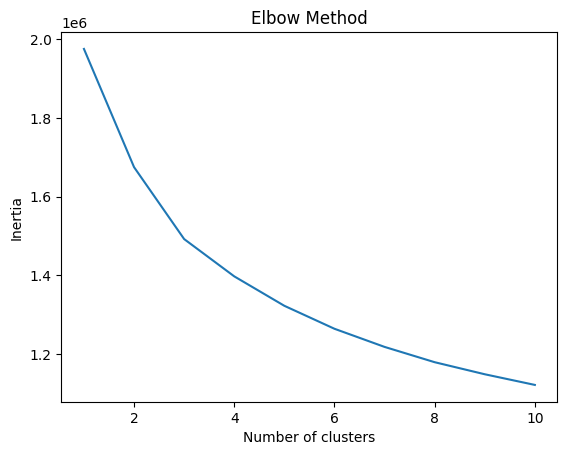

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X and future_matches_calculado are your dataframes

# Step 1: Selecting Features
# Replace with the actual feature names you want to use for clustering
selected_features = [
    'team1_GCR', 'team2_GCR',
    'team1_CM', 'team2_CM',
    'team1_ADCR', 'team2_ADCR',
    'team1_CCR', 'team2_CCR',
    'team1_corner_defense', 'team2_corner_defense',
    'team1_attack_defense_ratio', 'team2_attack_defense_ratio',
    'team1_corner_attack_ratio', 'team2_corner_attack_ratio',
    'team1_effective_attack', 'team2_effective_attack',
    'team1_effective_defense', 'team2_effective_defense',
    'team1_corner_success', 'team2_corner_success',
    'team1_corner_conversion', 'team2_corner_conversion',
    'team1_corner_resilience', 'team2_corner_resilience','team1_over3.5_last5',
 'team1_under3.5_last5',
 'team2_over3.5_last5',
 'team2_under3.5_last5',
 'team1_over4.5_last5',
 'team1_under4.5_last5',
 'team2_over4.5_last5',
 'team2_under4.5_last5',
 'team1_over6.5_last5',
 'team1_under6.5_last5',
 'team2_over6.5_last5',
 'team2_under6.5_last5',
 'std_corners_lasts5_1_home',
 'std_corners_lasts5_2_away',
]

# Combine training and future data for clustering
combined_data = pd.concat([X[selected_features], future_matches_calculado[selected_features]])

# Step 2: Fitting KMeans
# Determine the optimal number of clusters (k) - Example using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_data)
    inertia.append(kmeans.inertia_)

# Plotting Elbow graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot
optimal_k = 8  # Replace with the optimal number you find

# Fit KMeans with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_data['class'] = kmeans.fit_predict(combined_data)

# Step 3: Assigning Clusters to Data
# Assign clusters back to the original dataframes
X['class'] = combined_data['class'][:len(X)]
future_matches_calculado['class'] = combined_data['class'][len(X):]

# Step 4: Analyzing Clusters
# If you want to analyze the clusters, you can print out the matches in each cluster
# Note: This step is optional and can be modified based on how you want to analyze or utilize the clusters

# Assuming you have a column 'team1' and 'team2' in your original dataframes
# Concatenate the original team names with the cluster assignments
original_data_with_teams = pd.concat([X[['team1', 'team2']], future_matches_calculado[['team1', 'team2']]])
original_data_with_teams['class'] = combined_data['class']



In [20]:
future_matches_calculado

,team1,team2,season,championship,team1_big_wins_last5,team1_big_losses_last5,team2_big_wins_last5,team2_big_losses_last5,team1_ah-2.5_wins_last5,team1_ah-2.5_losses_last5,...,team2_effective_attack,team1_effective_defense,team2_effective_defense,team1_corner_success,team2_corner_success,team1_corner_conversion,team2_corner_conversion,team1_corner_resilience,team2_corner_resilience,class
2599,624,626,2023,32,1.0,0.0,1.0,1.0,2.0,3.0,...,0.142857,0.069767,0.113208,0.548387,0.367347,0.230769,0.304348,4.250000,1.636364,0
2598,611,556,2023,32,0.0,0.0,0.0,2.0,1.0,4.0,...,0.097561,0.244898,0.161290,0.586957,0.658537,0.156250,0.125000,1.588235,1.800000,7
2597,476,654,2023,32,3.0,2.0,2.0,1.0,1.0,4.0,...,0.243902,0.046512,0.078431,0.411765,0.560976,0.346154,0.357143,3.000000,2.555556,4
2601,625,664,2023,32,0.0,0.0,0.0,2.0,0.0,5.0,...,0.196078,0.045455,0.152542,0.566038,0.294118,0.057143,0.500000,4.285714,1.071429,6
2600,521,565,2023,32,0.0,0.0,0.0,1.0,2.0,3.0,...,0.133333,0.137931,0.135135,0.451613,0.600000,0.242424,0.187500,2.153846,2.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,502,533,2023,28,2.0,0.0,0.0,1.0,3.0,2.0,...,0.119048,0.000000,0.069767,0.644444,0.523810,0.218750,0.192308,9.666667,3.142857,0
2358,569,574,2023,28,0.0,1.0,0.0,1.0,3.0,2.0,...,0.138889,0.166667,0.156250,0.763158,0.333333,0.121212,0.312500,2.636364,1.333333,1
2357,700,575,2023,28,0.0,2.0,1.0,0.0,0.0,5.0,...,0.055556,0.189189,0.083333,0.511628,0.611111,0.153846,0.071429,2.000000,1.571429,4
2359,763,681,2023,28,0.0,0.0,0.0,0.0,1.0,4.0,...,0.147059,0.200000,0.096774,0.568182,0.823529,0.206897,0.156250,2.272727,4.000000,2


In [21]:
print(set(X.columns) - set(future_matches_calculado.columns))


set()


In [22]:
list(X.dtypes)

[dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),

In [23]:
list(X.columns)

['championship',
 'team1',
 'team2',
 'season',
 'team1_big_wins_last5',
 'team1_big_losses_last5',
 'team2_big_wins_last5',
 'team2_big_losses_last5',
 'team1_ah-2.5_wins_last5',
 'team1_ah-2.5_losses_last5',
 'team2_ah-2.5_wins_last5',
 'team2_ah-2.5_losses_last5',
 'team1_ah+2.5_wins_last5',
 'team1_ah+2.5_losses_last5',
 'team2_ah+2.5_wins_last5',
 'team2_ah+2.5_losses_last5',
 'team1_over3.5_last5',
 'team1_under3.5_last5',
 'team2_over3.5_last5',
 'team2_under3.5_last5',
 'team1_over4.5_last5',
 'team1_under4.5_last5',
 'team2_over4.5_last5',
 'team2_under4.5_last5',
 'team1_over6.5_last5',
 'team1_under6.5_last5',
 'team2_over6.5_last5',
 'team2_under6.5_last5',
 'avg_scr_lasts3_1_home',
 'avg_scr_lasts5_1_home',
 'avg_scr_lasts3_1_away',
 'avg_scr_lasts5_1_away',
 'avg_conc_lasts3_1_home',
 'avg_conc_lasts5_1_home',
 'avg_conc_lasts3_1_away',
 'avg_conc_lasts5_1_away',
 'avg_scr_lasts3_2_home',
 'avg_scr_lasts5_2_home',
 'avg_scr_lasts3_2_away',
 'avg_scr_lasts5_2_away',
 'avg_

In [24]:
y1_uniques = datatotal['team1_corners'].unique()
print(y1_uniques)

[ 1. 10.  4.  0. 15.  9.  8.  5.  6.  7.  3. 12. 11. 14.  2. 13.]


In [25]:
# Contar ocorrências para 'y1'
y1_counts = y1.value_counts().sort_index().reindex(range(0, 31), fill_value=0)
print("Contagem de ocorrências para y1:")
print(y1_counts)

# Contar ocorrências para 'y2'
y2_counts = y2.value_counts().sort_index().reindex(range(0, 31), fill_value=0)
print("\nContagem de ocorrências para y2:")
print(y2_counts)


Contagem de ocorrências para y1:
team1_corners
0      716
1     2459
2     5085
3     7650
4     9290
5     9599
6     8720
7     7308
8     5632
9     3989
10    2801
11    1840
12    1120
13     717
14     421
15     465
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
Name: count, dtype: int64

Contagem de ocorrências para y2:
team2_corners
0      1591
1      5004
2      8229
3     10372
4     10748
5      9558
6      7464
7      5686
8      3615
9      2353
10     1385
11      858
12      417
13      288
14      139
15      105
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
Name: count, dtype: int64


Separando o treino e o teste e a normalização

In [26]:
from sklearn.preprocessing import StandardScaler

# Dividindo os dados com base na coluna 'season'
X_train = X[X['season'] < 2022].drop(['team1', 'team2', 'championship', 'season'], axis=1)
X_test = X[X['season'] >= 2022].drop(['team1', 'team2', 'championship', 'season'], axis=1)
y_train1 = y1[X['season'] < 2022]
y_test1 = y1[X['season'] >= 2022]
y_train2 = y2[X['season'] < 2022]
y_test2 = y2[X['season'] >= 2022]

# Escalando apenas as colunas que você quer (ajuste isso conforme suas necessidades)
cols_to_scale = [col for col in future_matches_calculado.columns if col not in ['team1', 'team2', 'championship', 'season']]

# Ajustar o escalonador com base no conjunto de treinamento
scaler = StandardScaler().fit(X_train[cols_to_scale])

# Reordenar as colunas para corresponder à ordem usada para ajustar o escalonador
X_train = X_train[cols_to_scale]
X_test = X_test[cols_to_scale]

# Aplicar o escalonamento
future_matches_calculado_scaled = future_matches_calculado.copy()
future_matches_calculado_scaled[cols_to_scale] = scaler.transform(future_matches_calculado[cols_to_scale])

# Transformar os conjuntos de treinamento e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preparar as colunas para o embedding
X_train_embed = X[X['season'] < 2022][['team1', 'team2', 'championship', 'season']]
X_test_embed = X[X['season'] >= 2022][['team1', 'team2', 'championship', 'season']]


In [27]:
list(X_train.columns)

['team1_big_wins_last5',
 'team1_big_losses_last5',
 'team2_big_wins_last5',
 'team2_big_losses_last5',
 'team1_ah-2.5_wins_last5',
 'team1_ah-2.5_losses_last5',
 'team2_ah-2.5_wins_last5',
 'team2_ah-2.5_losses_last5',
 'team1_ah+2.5_wins_last5',
 'team1_ah+2.5_losses_last5',
 'team2_ah+2.5_wins_last5',
 'team2_ah+2.5_losses_last5',
 'team1_over3.5_last5',
 'team1_under3.5_last5',
 'team2_over3.5_last5',
 'team2_under3.5_last5',
 'team1_over4.5_last5',
 'team1_under4.5_last5',
 'team2_over4.5_last5',
 'team2_under4.5_last5',
 'team1_over6.5_last5',
 'team1_under6.5_last5',
 'team2_over6.5_last5',
 'team2_under6.5_last5',
 'avg_scr_lasts3_1_home',
 'avg_scr_lasts5_1_home',
 'avg_scr_lasts3_1_away',
 'avg_scr_lasts5_1_away',
 'avg_conc_lasts3_1_home',
 'avg_conc_lasts5_1_home',
 'avg_conc_lasts3_1_away',
 'avg_conc_lasts5_1_away',
 'avg_scr_lasts3_2_home',
 'avg_scr_lasts5_2_home',
 'avg_scr_lasts3_2_away',
 'avg_scr_lasts5_2_away',
 'avg_conc_lasts3_2_home',
 'avg_conc_lasts5_2_home',


In [28]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train1.shape)
print(y_test1.shape)
print(y_train2.shape)
print(y_test2.shape)
print(X_train_embed.shape)
print(X_test_embed.shape)
print(future_matches_calculado_scaled.shape)

(61353, 147)
(6459, 147)
(61353,)
(6459,)
(61353,)
(6459,)
(61353, 4)
(6459, 4)
(152, 151)


Concatenando ambos Ys em um único tensor

In [29]:
import numpy as np

y_train_combined = np.stack((y_train1, y_train2), axis=-1)
y_test_combined = np.stack((y_test1, y_test2), axis=-1)



def to_one_hot(difference):
    # Inicializa um vetor de zeros
    one_hot = np.zeros(11)
    
    if difference >= 5:
        one_hot[0] = 1
    elif difference == 4:
        one_hot[1] = 1
    elif difference == 3:
        one_hot[2] = 1
    elif difference == 2:
        one_hot[3] = 1
    elif difference == 1:
        one_hot[4] = 1
    elif difference == 0:
        one_hot[5] = 1
    elif difference == -1:
        one_hot[6] = 1
    elif difference == -2:
        one_hot[7] = 1
    elif difference == -3:
        one_hot[8] = 1
    elif difference == -4:
        one_hot[9] = 1
    elif difference <= -5:
        one_hot[10] = 1
    
    return one_hot

# Calcula as diferenças de placar entre y_train1 e y_train2
differences_train = y_train1 - y_train2
differences_teste = y_test1 - y_test2


# Converte as diferenças de placar para one-hot encoding
one_hot_train = np.array([to_one_hot(diff) for diff in differences_train])
one_hot_test = np.array([to_one_hot(diff) for diff in differences_teste])

print(one_hot_train.shape) 
print(one_hot_test.shape)

print(y_train_combined.shape)
print(y_test_combined.shape)

(61353, 11)
(6459, 11)
(61353, 2)
(6459, 2)


In [30]:
print("Valores únicos de 'championship' em X_train_embed:", np.unique(X_train_embed['championship']))
print("Valores únicos de 'championship' em X_test_embed:", np.unique(X_test_embed['championship']))


Valores únicos de 'championship' em X_train_embed: [ 3  6  7  8  9 10 11 14 15 16 18 19 26 27 29 30 31 33]
Valores únicos de 'championship' em X_test_embed: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


In [31]:
print("Valores únicos de 'team1' em X_train_embed:", np.unique(X_train_embed['team1']))
print("Valores únicos de 'team2' em X_train_embed:", np.unique(X_train_embed['team2']))
print("Valores únicos de 'team1' em X_test_embed:", np.unique(X_test_embed['team1']))
print("Valores únicos de 'team2' em X_test_embed:", np.unique(X_test_embed['team2']))


Valores únicos de 'team1' em X_train_embed: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 23

In [32]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_loss(y_true, y_pred):
    # Base error: categorical crossentropy
    base_error = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    
    # Get the true class and the predicted class
    true_class = K.argmax(y_true, axis=-1)
    pred_class = K.argmax(y_pred, axis=-1)
    
    # Calculate the distance between the classes
    class_distance = K.abs(true_class - pred_class)
    
    # Additional penalty
    # Ensure class_distance is float before adding 0.001
    additional_penalty = K.log(K.cast(class_distance, dtype='float32') + 0.001)  
    
    # Ensuring all elements are float32
    base_error = K.cast(base_error, dtype='float32')
    additional_penalty = K.cast(additional_penalty, dtype='float32')
    
    # Weighing the base error and the additional penalty to calculate the total error
    loss = K.cast(0.9, dtype='float32') * base_error + K.cast(0.1, dtype='float32') * additional_penalty
    
    # Ensure the loss does not go below 0.0001
    loss = K.maximum(0.0001, loss)
    
    return loss


Arquitetura da NN

In [33]:
(pd.concat([X_train_embed['season'], X_test_embed['season']]).unique())

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021., 2022., 2023.])

Treinando a rede

In [98]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# Obter o número de times e campeonatos únicos
n_teams = max(pd.concat([X_train_embed['team1'], X_train_embed['team2'],X_test_embed['team1'], X_test_embed['team2']]).unique())
n_champ = max(pd.concat([X_train_embed['championship'], X_test_embed['championship']]).unique())
n_seasons = int(max(pd.concat([X_train_embed['season'], X_test_embed['season']]).unique()))


# ==== Parte 1: Definindo os Inputs para o Embedding ====
# Estes são os inputs que vão alimentar os embeddings. 
# Cada input tem a dimensão de (1,) porque cada jogo tem exatamente um 'team1', um 'team2', e um 'championship'.
team1_input = Input(shape=(1,), name='Team1-Input')
team2_input = Input(shape=(1,), name='Team2-Input')
champ_input = Input(shape=(1,), name='Championship-Input')
season_input = Input(shape=(1,), name='Season-Input')

# ==== Parte 2: Criando os Embeddings ====
# n_teams e n_champ são o número de times e campeonatos únicos, respectivamente.
# O output_dim é um hiperparâmetro para você ajustar. Ele define o tamanho do espaço de embedding.


team1_embedding = Embedding(input_dim=n_teams+1, output_dim=64, name='Team1-Embedding')(team1_input)  # output_dim ajustável
team2_embedding = Embedding(input_dim=n_teams+1, output_dim=64, name='Team2-Embedding')(team2_input)  # output_dim ajustável
champ_embedding = Embedding(input_dim=n_champ+1, output_dim=5, name='Championship-Embedding')(champ_input)  # output_dim ajustável
season_embedding = Embedding(input_dim=n_seasons+1, output_dim=5, name='Season-Embedding')(season_input)


# ==== Parte 3: Achatando os Embeddings ====
# Cada embedding precisa ser achatado para ser concatenado posteriormente
team1_embedding = Flatten()(team1_embedding)
team2_embedding = Flatten()(team2_embedding)
champ_embedding = Flatten()(champ_embedding)
season_embedding = Flatten()(season_embedding)

# ==== Parte 4: Outras Características ====
# Este é o input para as outras características (já escaladas) do seu conjunto de dados.
other_features_input = Input(shape=(X_train_scaled.shape[1],), name='Other-Features-Input')

# ==== Parte 5: Concatenando Tudo ====
# Aqui, todos os embeddings e as outras características são concatenados em um único vetor
merged = Concatenate()([team1_embedding, team2_embedding, champ_embedding, season_embedding, other_features_input])

# ==== Parte 6: Camadas Ocultas ====
# Estes são os neurônios e camadas totalmente conectadas (Dense) onde a "aprendizagem" real acontece.
# Você pode ajustar o número de neurônios, a função de ativação, e outros hiperparâmetros aqui.
from tensorflow.keras.regularizers import l1, l2

hidden_layer = Dense(352, activation='tanh', kernel_regularizer=l2(0.0001), kernel_initializer='glorot_normal')(merged)
hidden_layer = Dropout(0.3)(hidden_layer)

hidden_layer = Dense(176, activation='tanh')(hidden_layer)
hidden_layer = Dropout(0.2)(hidden_layer)

hidden_layer = Dense(88, activation='tanh')(hidden_layer)
hidden_layer = Dropout(0.2)(hidden_layer)

hidden_layer = Dense(44, activation='tanh')(hidden_layer)
hidden_layer = Dropout(0.2)(hidden_layer)

hidden_layer = Dense(22, activation='tanh')(hidden_layer)


hidden_layer = Dense(11, activation='tanh')(hidden_layer)

#hidden_layer = Dense(8, activation='tanh')(hidden_layer)

#hidden_layer = Dense(4, activation='tanh')(hidden_layer)
# ==== Parte 7: Camada de Saída ====
# Esta é a camada de saída. A função de ativação 'linear' é usada para regressão.
output = Dense(11, activation='softmax', name='Output-Layer')(hidden_layer)

# ==== Parte 8: Compilando o Modelo ====
# Finalmente, o modelo é compilado. O otimizador Adam é usado, com uma taxa de aprendizagem de 0.001.
# A perda é definida como 'mean_squared_error', que é comum para problemas de regressão.
model = Model(
    inputs=[team1_input, team2_input, champ_input, season_input, other_features_input], 
    outputs=[output]
)

from tensorflow.keras.callbacks import EarlyStopping

# Parâmetros para Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True)

# Número de épocas
n_epochs = 100

# Compilando o modelo
model.compile(optimizer=Adam(0.0001), loss=custom_loss, metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(
    [X_train_embed['team1'], X_train_embed['team2'], X_train_embed['championship'],X_train_embed['season'],  X_train_scaled], 
    one_hot_train,  # Usando os vetores one-hot como rótulos
    epochs=n_epochs,
    batch_size=512,
    verbose=1,
    validation_data=([X_test_embed['team1'], X_test_embed['team2'], X_test_embed['championship'], X_test_embed['season'], X_test_scaled], one_hot_test),  # Usando os vetores one-hot como rótulos
    callbacks=[early_stopping]
)


Epoch 1/100
120/120 [==============================] - 4s 18ms/step - loss: 2.2093 - accuracy: 0.1465 - val_loss: 2.0899 - val_accuracy: 0.2103
Epoch 2/100
120/120 [==============================] - 2s 14ms/step - loss: 2.1342 - accuracy: 0.1867 - val_loss: 2.0598 - val_accuracy: 0.2231
Epoch 3/100
120/120 [==============================] - 2s 14ms/step - loss: 2.0982 - accuracy: 0.2012 - val_loss: 2.0451 - val_accuracy: 0.2236
Epoch 4/100
120/120 [==============================] - 2s 14ms/step - loss: 2.0746 - accuracy: 0.2099 - val_loss: 2.0349 - val_accuracy: 0.2273
Epoch 5/100
120/120 [==============================] - 2s 14ms/step - loss: 2.0628 - accuracy: 0.2143 - val_loss: 2.0271 - val_accuracy: 0.2306
Epoch 6/100
120/120 [==============================] - 2s 14ms/step - loss: 2.0560 - accuracy: 0.2159 - val_loss: 2.0231 - val_accuracy: 0.2303
Epoch 7/100
120/120 [==============================] - 2s 14ms/step - loss: 2.0459 - accuracy: 0.2189 - val_loss: 2.0205 - val_accuracy:

In [ ]:
#256 - 0.2351
#512 - 0.2350

Salvando o modelo

In [97]:
#Salvar o modelo
model.save('modelo17-10-512-84neu-softmax-02352.keras')

Carregando o modelo

In [34]:
from tensorflow.keras.models import load_model

#Substitua 'caminho/para/sua/pasta/' pelo caminho real onde o modelo está salvo
caminho_completo_para_modelo = r'C:\Users\mathe\OneDrive\Área de Trabalho\SoccerIA\MathIA_v7\modelo17-10-512-84neu-softmax-02352.keras'

# Carregar o modelo
model = load_model(caminho_completo_para_modelo, custom_objects={'custom_loss': custom_loss})


In [35]:
future_matches_calculado_scaled.shape

(152, 151)

In [36]:
future_matches_calculado_scaled.head()

,team1,team2,season,championship,team1_big_wins_last5,team1_big_losses_last5,team2_big_wins_last5,team2_big_losses_last5,team1_ah-2.5_wins_last5,team1_ah-2.5_losses_last5,...,team2_effective_attack,team1_effective_defense,team2_effective_defense,team1_corner_success,team2_corner_success,team1_corner_conversion,team2_corner_conversion,team1_corner_resilience,team2_corner_resilience,class
2599,624,626,2023,32,0.174966,-0.986648,0.117516,0.184672,0.596325,-0.596325,...,0.869272,-0.662103,0.121505,1.017522,-0.393065,0.036402,0.817993,1.130140,-0.442100,-1.583941
2598,611,556,2023,32,-0.907378,-0.986648,-0.939662,1.319616,-0.333442,0.333442,...,-0.077597,2.934175,1.190520,1.338918,1.894091,-0.623267,-0.758074,-1.099040,-0.258652,1.486862
2597,476,654,2023,32,2.339654,1.233839,1.174694,0.184672,-0.333442,0.333442,...,2.981517,-1.139657,-0.651666,-0.120942,1.127796,1.057824,1.281943,0.083287,0.588382,0.170804
2601,625,664,2023,32,-0.907378,-0.986648,-0.939662,1.319616,-1.263209,1.263209,...,1.981806,-1.161364,0.996028,1.164603,-0.968246,-1.500596,2.537338,1.160050,-1.075434,1.048176
2600,521,565,2023,32,-0.907378,-0.986648,-0.939662,0.184672,0.596325,-0.596325,...,0.670187,0.737626,0.609017,0.211110,1.434314,0.139576,-0.208839,-0.625351,0.750315,-1.583941


Output!!!!!

In [37]:
# Inicializando uma lista vazia para armazenar as previsões
corner_predictions = []

# Iterar sobre cada linha em 'future_matches' e 'future_matches_calculado_scaled'
for (index1, row1), (index2, row2) in zip(future_matches.iterrows(), future_matches_calculado_scaled.iterrows()):
    # Prepare os dados de entrada para a previsão
    team1_input_data = np.array([[row2['team1']]], dtype=np.float32)
    team2_input_data = np.array([[row2['team2']]], dtype=np.float32)
    champ_input_data = np.array([[row2['championship']]], dtype=np.float32)
    season_input_data = np.array([[row2['season']]], dtype=np.float32)
    other_features_data = np.array([row2.drop(['team1', 'team2', 'championship', 'season']).astype(np.float32)])
    
    # Faça a previsão usando o modelo
    pred = model.predict([team1_input_data, team2_input_data, champ_input_data, season_input_data, other_features_data])
    
    # Convertendo as previsões (que são arrays numpy) para listas para melhor visualização
    pred_list = pred[0].tolist()
    
    # Armazenar as previsões na lista
    corner_predictions.append([row1['date'], row1['championship'], row1['team1'], row1['team2'],  pred_list])
    
    # Imprimir as previsões
    print(f"Prediction for match between {row1['team1']} and {row1['team2']}: {pred_list}")

# Criar um DataFrame a partir da lista de previsões
df = pd.DataFrame(corner_predictions, columns=['Date', 'Championship', 'Team1_name', 'Team2_name', 'Match_prediction'])

df


1/1 [==============================] - 0s 330ms/step
Prediction for match between ifk gotemburgo and ik sirius: [0.22454644739627838, 0.07335107773542404, 0.10731557011604309, 0.09757991135120392, 0.10395000874996185, 0.09294547140598297, 0.068888358771801, 0.06355166435241699, 0.06183452531695366, 0.041451066732406616, 0.0645858570933342]
1/1 [==============================] - 0s 26ms/step
Prediction for match between halmstad and degerfors if: [0.21979451179504395, 0.08362644165754318, 0.10021436214447021, 0.09912001341581345, 0.11216536909341812, 0.08494484424591064, 0.07628271728754044, 0.08067163825035095, 0.05054863169789314, 0.04093341901898384, 0.05169806629419327]
1/1 [==============================] - 0s 26ms/step
Prediction for match between aik and mjallby: [0.21028748154640198, 0.07167690247297287, 0.08551322668790817, 0.10618195682764053, 0.10348246991634369, 0.09454313665628433, 0.08842980861663818, 0.08488176017999649, 0.057008445262908936, 0.03708082437515259, 0.060914

,Date,Championship,Team1_name,Team2_name,Match_prediction
0,2023-10-07,SUE A,ifk gotemburgo,ik sirius,"[0.22454644739627838, 0.07335107773542404, 0.1..."
1,2023-10-07,SUE A,halmstad,degerfors if,"[0.21979451179504395, 0.08362644165754318, 0.1..."
2,2023-10-07,SUE A,aik,mjallby,"[0.21028748154640198, 0.07167690247297287, 0.0..."
3,2023-10-08,SUE A,ifk varnamo,norrkoping,"[0.17625831067562103, 0.07573046535253525, 0.0..."
4,2023-10-08,SUE A,brommapojkarna,elfsborg,"[0.07435186952352524, 0.054954420775175095, 0...."
...,...,...,...,...,...
147,2023-10-28,POR A,benfica,casa pia ac,"[0.40825483202934265, 0.0800439789891243, 0.09..."
148,2023-10-29,POR A,estrela amadora,famalicão,"[0.10898566246032715, 0.05343103036284447, 0.0..."
149,2023-10-29,POR A,rio ave,farense,"[0.14862138032913208, 0.06559767574071884, 0.0..."
150,2023-10-29,POR A,vizela,porto,"[0.058052413165569305, 0.03939367085695267, 0...."


In [38]:
# Inicializando uma lista vazia para armazenar as odds
odds_predictions = []

# Iterar sobre cada linha no DataFrame de previsões
for index, row in df.iterrows():
    pred_probs = row['Match_prediction']
    
    # Calcular as probabilidades para cada mercado
    #4.5
    team1_minus45_prob = pred_probs[0]
    team1_plus45_prob = 1 - pred_probs[10]
    team2_minus45_prob = pred_probs[10]
    team2_plus45_prob = 1 - pred_probs[0]

    #3.5
    team1_minus35_prob = pred_probs[0] + pred_probs[1]
    team1_plus35_prob = 1 - pred_probs[10] - pred_probs[9]
    team2_minus35_prob = pred_probs[10] + pred_probs[9]
    team2_plus35_prob = 1 - pred_probs[0] - pred_probs[1]
    #2.5
    team1_minus25_prob = pred_probs[0] + pred_probs[1] + pred_probs[2]
    team1_plus25_prob = 1 - pred_probs[10] - pred_probs[9] - pred_probs[8]
    team2_minus25_prob = pred_probs[10] + pred_probs[9] + pred_probs[8]
    team2_plus25_prob = 1 - pred_probs[0] - pred_probs[1] - pred_probs[2]
    #1.5
    team1_minus15_prob = pred_probs[0] + pred_probs[1] + pred_probs[2] + pred_probs[3]
    team1_plus15_prob = 1 - pred_probs[10] - pred_probs[9] - pred_probs[8] - pred_probs[7]
    team2_minus15_prob = pred_probs[10] + pred_probs[9] + pred_probs[8] + pred_probs[7]
    team2_plus15_prob = 1 - pred_probs[0] - pred_probs[1] - pred_probs[2] - pred_probs[3]
    #0.5
    team1_minus05_prob = pred_probs[0] + pred_probs[1]+ pred_probs[2] + pred_probs[3] + pred_probs[4]
    team1_plus05_prob = 1 - pred_probs[10] - pred_probs[9] - pred_probs[8] - pred_probs[7]- pred_probs[6]
    team2_minus05_prob = pred_probs[10] + pred_probs[9] + pred_probs[8] + pred_probs[7] + pred_probs[6]
    team2_plus05_prob = 1 - pred_probs[0] - pred_probs[1] - pred_probs[2] - pred_probs[3]- pred_probs[4]

    # Converter as probabilidades em odds
    team1_minus45_odds = 1 / team1_minus45_prob
    team1_plus45_odds = 1 / team1_plus45_prob
    team1_minus35_odds = 1 / team1_minus35_prob
    team1_plus35_odds = 1 / team1_plus35_prob
    team1_minus25_odds = 1 / team1_minus25_prob
    team1_plus25_odds = 1 / team1_plus25_prob
    team1_minus15_odds = 1 / team1_minus15_prob
    team1_plus15_odds = 1 / team1_plus15_prob
    team1_minus05_odds = 1 / team1_minus05_prob
    team1_plus05_odds = 1 / team1_plus05_prob
    team2_minus45_odds = 1 / team2_minus45_prob
    team2_plus45_odds = 1 / team2_plus45_prob
    team2_minus35_odds = 1 / team2_minus35_prob
    team2_plus35_odds = 1 / team2_plus35_prob
    team2_minus25_odds = 1 / team2_minus25_prob
    team2_plus25_odds = 1 / team2_plus25_prob
    team2_minus15_odds = 1 / team2_minus15_prob
    team2_plus15_odds = 1 / team2_plus15_prob
    team2_minus05_odds = 1 / team2_minus05_prob
    team2_plus05_odds = 1 / team2_plus05_prob
    
    # Armazenar as odds na lista
    odds_predictions.append([
        row['Date'], row['Championship'],row['Team1_name'], row['Team2_name'], 
        team1_minus45_odds, team1_plus45_odds,
        team1_minus35_odds, team1_plus35_odds,
        team1_minus25_odds, team1_plus25_odds,
        team1_minus15_odds, team1_plus15_odds,
        team1_minus05_odds, team1_plus05_odds,
        team2_minus45_odds, team2_plus45_odds,
        team2_minus35_odds, team2_plus35_odds,
        team2_minus25_odds, team2_plus25_odds,
        team2_minus15_odds, team2_plus15_odds,
        team2_minus05_odds, team2_plus05_odds
    ])

# Criar um DataFrame a partir da lista de odds
odds_df = pd.DataFrame(odds_predictions, columns=[
     'Date', 'Championship','Team1_name', 'Team2_name',
    'Team1_-4.5_Odds', 'Team1_+4.5_Odds',
    'Team1_-3.5_Odds', 'Team1_+3.5_Odds',
    'Team1_-2.5_Odds', 'Team1_+2.5_Odds',
    'Team1_-1.5_Odds', 'Team1_+1.5_Odds',
    'Team1_-0.5_Odds', 'Team1_+0.5_Odds',
    'Team2_-4.5_Odds', 'Team2_+4.5_Odds',
    'Team2_-3.5_Odds', 'Team2_+3.5_Odds',
    'Team2_-2.5_Odds', 'Team2_+2.5_Odds',
    'Team2_-1.5_Odds', 'Team2_+1.5_Odds',
    'Team2_-0.5_Odds', 'Team2_+0.5_Odds'
])

# Converte a coluna 'date' para o tipo de data do pandas
odds_df['Date'] = pd.to_datetime(odds_df['Date'])

# Formata a coluna 'date' para o formato de data brasileiro (dd/mm/yyyy)
odds_df['Date'] = odds_df['Date'].dt.strftime('%d/%m/%Y')

odds_df = odds_df.sort_values(['Championship', 'Date', 'Team1_name'])

odds_df

,Date,Championship,Team1_name,Team2_name,Team1_-4.5_Odds,Team1_+4.5_Odds,Team1_-3.5_Odds,Team1_+3.5_Odds,Team1_-2.5_Odds,Team1_+2.5_Odds,...,Team2_-4.5_Odds,Team2_+4.5_Odds,Team2_-3.5_Odds,Team2_+3.5_Odds,Team2_-2.5_Odds,Team2_+2.5_Odds,Team2_-1.5_Odds,Team2_+1.5_Odds,Team2_-0.5_Odds,Team2_+0.5_Odds
13,20/10/2023,ALE A,borussia dortmund,werder bremen,2.762853,1.029383,2.238111,1.054004,1.805891,1.091308,...,35.032906,1.567262,19.516983,1.807682,11.951942,2.240863,8.131011,2.900992,5.335814,3.785742
54,21/10/2023,ALE A,mainz,bayern de munique,32.401963,1.287017,14.011016,1.521334,9.153414,1.840220,...,4.484113,1.031845,2.918157,1.076858,2.190165,1.122648,1.715464,1.200729,1.536684,1.357604
41,21/10/2023,ALE A,sc freiburgo,vfl bochum,3.568269,1.036064,2.689048,1.072737,2.077084,1.124872,...,28.728685,1.389367,14.748075,1.592050,9.008205,1.928433,5.982169,2.449486,4.193531,3.187911
44,21/10/2023,ALE A,sv darmstadt 98,rb leipzig,36.375214,1.251228,14.534783,1.504169,8.892777,1.863740,...,4.980444,1.028268,2.983462,1.073884,2.157756,1.126698,1.701740,1.214576,1.525340,1.367082
24,21/10/2023,ALE A,tsg hoffenheim,eintracht frankfurt,5.382443,1.062390,3.663688,1.121415,2.698040,1.198633,...,17.028290,1.228183,9.236232,1.375419,6.034414,1.588914,3.902040,1.860497,3.026439,2.422864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,08/10/2023,SUE A,brommapojkarna,elfsborg,13.449561,1.275002,7.733576,1.394501,5.612982,1.578525,...,4.636332,1.080324,3.534846,1.148510,2.728534,1.216780,2.163036,1.323913,1.830518,1.503759
6,08/10/2023,SUE A,hammarby if,bk hacken,5.934259,1.072565,3.901153,1.121897,2.951551,1.224207,...,14.780777,1.202665,9.203651,1.344691,5.460172,1.512413,4.015368,1.810713,3.029196,2.132402
3,08/10/2023,SUE A,ifk varnamo,norrkoping,5.673491,1.138020,3.968431,1.202584,3.062505,1.293141,...,8.245327,1.213973,5.936219,1.336878,4.411322,1.484847,3.222323,1.700968,2.555409,2.035491
5,08/10/2023,SUE A,kalmar,malmo,16.492638,1.303611,9.282488,1.466828,6.654965,1.668726,...,4.293690,1.064547,3.142115,1.120737,2.495380,1.176836,1.965155,1.286547,1.691352,1.453622


In [39]:
odds_df.to_excel("av8.4_softmax.xlsx")

Criando e tratando os times para verificar jogos próximos

In [37]:
lista_teams = list(odds_df['Team1_name']) + list(odds_df['Team2_name']) 

In [38]:
lista_teams

['flamengo',
 'internacional',
 'red bull bragantino',
 'coritiba',
 'fortaleza',
 'santos',
 'fc nuremberga',
 'sc paderborn',
 'salford city',
 'real saragoza',
 'palmeiras',
 'cuiabá',
 'kvc westerlo',
 'msv duisburgo',
 'bradford city',
 'vasco da gama',
 'albacete',
 'real valladolid',
 'forest green rovers',
 'accrington stanley',
 'afc wimbledon',
 'fleetwood town',
 'huesca',
 'gillingham',
 'wrexham',
 'stevenage f.c.',
 'reading',
 'shrewsbury town',
 'newport county afc',
 'mk dons',
 'atlético mineiro',
 'crawley town',
 'port vale fc',
 'rot-weiss essen',
 'peterborough united',
 'karlsruher sc',
 'wycombe wanderers',
 'derby county',
 'barnsley fc',
 'lincoln city',
 'clube brugge',
 'rwd molenbeek 47',
 'royal union saint-gilloise',
 'hansa rostock',
 'ifk gotemburgo',
 'exeter city',
 'djurgardens if',
 'sv sandhausen',
 'sv elversberg',
 'vfb lubeck',
 'bielefeld',
 'schalke 04',
 'ik sirius',
 'borussia dortmund ii',
 'fc ingolstadt',
 'wigan fc',
 'eibar',
 'hertha b

Printando as diferenças de datas

In [39]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
from datetime import datetime

# Dicionário para converter o nome do mês de português para inglês
month_map = {
    'jan': 'Jan',
    'fev': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'mai': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'set': 'Sep',
    'out': 'Oct',
    'nov': 'Nov',
    'dez': 'Dec'
}

# Função para extrair a data do texto do confronto
def extract_date(confronto_text):
    date_match = re.search(r'(\d{1,2}) (set|out|jan|fev|mar|abr|mai|jun|jul|ago|nov|dez)', confronto_text.lower())
    if date_match:
        day = date_match.group(1)
        month_pt = date_match.group(2)
        month_en = month_map.get(month_pt)
        date_str = f"{day} {month_en}"
        return datetime.strptime(date_str, '%d %b')
    return None

# Restante do código segue o mesmo.


def is_relevant_game(confronto_text):
    irrelevant_keywords = ['Femin', 'Sub', 'women', 'u20']
    for keyword in irrelevant_keywords:
        if keyword.lower() in confronto_text.lower():
            return False
    return True

def colored_print(text, days):
    color_code = "\033[91m" if days <= 4 else "\033[0m"  # 91 é o código para vermelho
    print(f"{text} {color_code}{days}\033[0m")  # \033[0m reseta a cor

with open('saida_dif_dias.txt', 'w') as f:
    for time in lista_teams:
        try:
            driver = webdriver.Chrome()
            driver.maximize_window()
            driver.get('https://oddspedia.com/br/futebol')
            
            wait = WebDriverWait(driver, 10)
            search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div/input')))
            
            search_box.send_keys(time)
            search_box.send_keys(Keys.RETURN)
            
            all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
            
            filtered_matches = [match for match in all_matches if is_relevant_game(match.text)]
            
            filtered_dates = [extract_date(match.text) for match in filtered_matches if extract_date(match.text)]

            f.write(f"\nPróximas partidas para {time}:\n")
            print(f"\nPróximas partidas para {time}:")
            
            for i, match in enumerate(filtered_matches):
                output = f"\nJogo {i+1}:\n{match.text}\n"  # Conteúdo do jogo
                f.write(output)  # Escreve no arquivo
                print(output)  # Imprime na tela
                
                if i < len(filtered_dates) - 1:
                    diff = (filtered_dates[i + 1] - filtered_dates[i]).days
                    colored_output = f"Diferença de dias para o próximo jogo: {diff}\n"
                    f.write(colored_output)  # Escreve no arquivo
                    colored_print("Diferença de dias para o próximo jogo:", diff)  # Imprime na tela
            
            f.write("-"*70 + "\n")  # Escreve no arquivo
            print("-"*70)
            
        except Exception as e:
            error_output = f"Erro: {str(e)}\n"
            f.write(error_output)  # Escreve no arquivo
            print(error_output)  # Imprime na tela
            import traceback
            traceback.print_exc()
        
        finally:
            driver.close()









Próximas partidas para flamengo:

Jogo 1:
BRASILEIRÃO SÉRIE A
13 set
Flamengo
Athletico-PR

Diferença de dias para o próximo jogo: 4

Jogo 2:
COPA DO BRASIL
17 set
Flamengo
São Paulo

Diferença de dias para o próximo jogo: 3

Jogo 3:
BRASILEIRÃO SÉRIE A
20 set
Goiás
Flamengo

Diferença de dias para o próximo jogo: 4

Jogo 4:
COPA DO BRASIL
24 set
São Paulo
Flamengo

Diferença de dias para o próximo jogo: 7

Jogo 5:
BRASILEIRÃO SÉRIE A
01 out
Flamengo
Bahia

----------------------------------------------------------------------

Próximas partidas para internacional:

Jogo 1:
LIGA DRUGA CRNE GORE
13 set
FK Lovcen
FK Internacional Podgorica

Diferença de dias para o próximo jogo: 0

Jogo 2:
BRASILEIRÃO SÉRIE A
13 set
Internacional
São Paulo

Diferença de dias para o próximo jogo: 3

Jogo 3:
SINGAPURA PRIMEIRA LIGA
16 set
Home United
Geylang Internacional

Diferença de dias para o próximo jogo: 1

Jogo 4:
LIGA DRUGA CRNE GORE
17 set
FK Internacional Podgorica
FK Iskra Danilovgrad

Diferen

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para fc nuremberga:

Jogo 1:
LIGA REGIONAL BAYERN
15 set
Greuther Furth II
1 FC Nuremberga II

Diferença de dias para o próximo jogo: 0

Jogo 2:
2ª BUNDESLIGA
15 set
FC Nuremberga
Greuther Furth

Diferença de dias para o próximo jogo: 8

Jogo 3:
2ª BUNDESLIGA
23 set
Eintracht Braunschweig
FC Nuremberga

Diferença de dias para o próximo jogo: 0

Jogo 4:
LIGA REGIONAL BAYERN
23 set
1 FC Nuremberga II
Eintracht Bamberg 2010

----------------------------------------------------------------------

Próximas partidas para sc paderborn:

Jogo 1:
2ª BUNDESLIGA
15 set
SC Paderborn
Wehen Wiesbaden

Diferença de dias para o próximo jogo: 7

Jogo 2:
2ª BUNDESLIGA
22 set
FC Magdeburg
SC Paderborn

Diferença de dias para o próximo jogo: 0

Jogo 3:
REGIONALLIGA OESTE
22 set
Monchengladbach II
SC Paderborn 07 II

----------------------------------------------------------------------

Próximas partidas para salford city:

Jogo 1:
LEAGUE TWO
15 set
Salford City
Notts County

Diferença 

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para kvc westerlo:

Jogo 1:
PRIMEIRA DIVISÃO A
15 set
KVC Westerlo
Royal Antwerp FC

Diferença de dias para o próximo jogo: 7

Jogo 2:
PRIMEIRA DIVISÃO A
22 set
Standard Liege
KVC Westerlo

Diferença de dias para o próximo jogo: 9

Jogo 3:
PRIMEIRA DIVISÃO A
01 out
Genk
KVC Westerlo

----------------------------------------------------------------------

Próximas partidas para msv duisburgo:

Jogo 1:
3. LIGA
15 set
MSV Duisburgo
SC Verl

Diferença de dias para o próximo jogo: 8

Jogo 2:
3. LIGA
23 set
Köln
MSV Duisburgo

Diferença de dias para o próximo jogo: 4

Jogo 3:
3. LIGA
27 set
Borussia Dortmund II
MSV Duisburgo

Diferença de dias para o próximo jogo: 3

Jogo 4:
3. LIGA
30 set
MSV Duisburgo
Preusen Munster

----------------------------------------------------------------------

Próximas partidas para bradford city:

Jogo 1:
LEAGUE TWO
16 set
Bradford City
Harrogate Town FC

Diferença de dias para o próximo jogo: 7

Jogo 2:
LEAGUE TWO
23 set
Newport County AFC


Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para reading:

Jogo 1:
LEAGUE ONE
16 set
Reading
Bolton Wanderers FC

Diferença de dias para o próximo jogo: 3

Jogo 2:
TROFÉU DA EFL
19 set
Exeter City
Reading

Diferença de dias para o próximo jogo: 4

Jogo 3:
LEAGUE ONE
23 set
Blackpool FC
Reading

----------------------------------------------------------------------

Próximas partidas para shrewsbury town:

Jogo 1:
LEAGUE ONE
16 set
Shrewsbury Town
Bristol Rovers

Diferença de dias para o próximo jogo: 7

Jogo 2:
LEAGUE ONE
23 set
Leyton Orient
Shrewsbury Town

Diferença de dias para o próximo jogo: 7

Jogo 3:
LEAGUE ONE
30 set
Shrewsbury Town
Charlton Athletic

Diferença de dias para o próximo jogo: 3

Jogo 4:
LEAGUE ONE
03 out
Oxford United
Shrewsbury Town

----------------------------------------------------------------------

Próximas partidas para newport county afc:

Jogo 1:
LEAGUE TWO
16 set
Newport County AFC
Barrow

Diferença de dias para o próximo jogo: 7

Jogo 2:
LEAGUE TWO
23 set
Newport County AFC
B

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para crawley town:

Jogo 1:
LEAGUE TWO
16 set
Crawley Town
Tranmere Rovers

Diferença de dias para o próximo jogo: 7

Jogo 2:
LEAGUE TWO
23 set
Grimsby Town
Crawley Town

Diferença de dias para o próximo jogo: 7

Jogo 3:
LEAGUE TWO
30 set
Crawley Town
Sutton United FC

Diferença de dias para o próximo jogo: 3

Jogo 4:
LEAGUE TWO
03 out
Doncaster Rovers
Crawley Town

Diferença de dias para o próximo jogo: 4

Jogo 5:
LEAGUE TWO
07 out
Crawley Town
Wrexham

----------------------------------------------------------------------

Próximas partidas para port vale fc:

Jogo 1:
LEAGUE ONE
16 set
Port Vale FC
Northampton

Diferença de dias para o próximo jogo: 3

Jogo 2:
LEAGUE ONE
19 set
Port Vale FC
Burton Albion

Diferença de dias para o próximo jogo: 4

Jogo 3:
LEAGUE ONE
23 set
Cambridge Utd FC
Port Vale FC

Diferença de dias para o próximo jogo: 3

Jogo 4:
COPA DA LIGA INGLESA
26 set
Port Vale FC
Sutton United FC

Diferença de dias para o próximo jogo: 4

Jogo 5:
LEAGUE

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para waldhof mannheim:

Jogo 1:
3. LIGA
17 set
Waldhof Mannheim
SSV Ulm 1846

Diferença de dias para o próximo jogo: 6

Jogo 2:
3. LIGA
23 set
FC Saarbrucken
Waldhof Mannheim

Diferença de dias para o próximo jogo: 7

Jogo 3:
3. LIGA
30 set
Waldhof Mannheim
SC Friburgo II

Diferença de dias para o próximo jogo: 4

Jogo 4:
3. LIGA
04 out
Jahn Regensburg
Waldhof Mannheim

Diferença de dias para o próximo jogo: 3

Jogo 5:
3. LIGA
07 out
Waldhof Mannheim
Köln

----------------------------------------------------------------------

Próximas partidas para elfsborg:

Jogo 1:
LIGA ALLSVENSKAN
17 set
Elfsborg
Kalmar

Diferença de dias para o próximo jogo: 8

Jogo 2:
LIGA ALLSVENSKAN
25 set
Halmstad
Elfsborg

Diferença de dias para o próximo jogo: 7

Jogo 3:
LIGA ALLSVENSKAN
02 out
Elfsborg
Varbergs BoIS FC

Diferença de dias para o próximo jogo: 6

Jogo 4:
LIGA ALLSVENSKAN
08 out
Brommapojkarna
Elfsborg

Diferença de dias para o próximo jogo: 15

Jogo 5:
LIGA ALLSVENSKAN
23 o

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 



Erro: Message: 




Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para bahia:

Jogo 1:
TORNEIO FEDERAL A
13 set
Liniers de Bahia Blanca
Club Cipolletti

Diferença de dias para o próximo jogo: 1

Jogo 2:
BRASILEIRÃO SÉRIE A
14 set
Coritiba
Bahia

Diferença de dias para o próximo jogo: 3

Jogo 3:
TORNEIO FEDERAL A
17 set
Olimpo Bahia Blanco
Club Circulo Deportivo

Diferença de dias para o próximo jogo: 1

Jogo 4:
BRASILEIRÃO SÉRIE A
18 set
Bahia
Santos

----------------------------------------------------------------------

Próximas partidas para corinthians:

Jogo 1:
BRASILEIRÃO SÉRIE A
14 set
Fortaleza
Corinthians

Diferença de dias para o próximo jogo: 2

Jogo 2:
CHALLENGE LEAGUE
16 set
Zejtun Corinthians FC
Marsa FC

----------------------------------------------------------------------

Próximas partidas para cruzeiro:

Jogo 1:
TORNEIO FEDERAL A
13 set
Cruzeiro do Norte
Juventud Antoniana

Diferença de dias para o próximo jogo: 1

Jogo 2:
BRASILEIRÃO SÉRIE A
14 set
Santos
Cruzeiro

Diferença de dias para o próximo jogo: 3

Jogo 

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 



Erro: Message: 




Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para royal antwerp fc:

Jogo 1:
PRIMEIRA DIVISÃO A
15 set
KVC Westerlo
Royal Antwerp FC

Diferença de dias para o próximo jogo: 4

Jogo 2:
LIGA DOS CAMPEÕES
19 set
Barcelona
Royal Antwerp FC

Diferença de dias para o próximo jogo: 4

Jogo 3:
PRIMEIRA DIVISÃO A
23 set
Royal Antwerp FC
RWD Molenbeek 47

Diferença de dias para o próximo jogo: 4

Jogo 4:
PRIMEIRA DIVISÃO A
27 set
Royal Antwerp FC
Gent

Diferença de dias para o próximo jogo: 3

Jogo 5:
PRIMEIRA DIVISÃO A
30 set
KV Mechelen
Royal Antwerp FC

----------------------------------------------------------------------

Próximas partidas para sc verl:

Jogo 1:
3. LIGA
15 set
MSV Duisburgo
SC Verl

Diferença de dias para o próximo jogo: 8

Jogo 2:
3. LIGA
23 set
SC Verl
Borussia Dortmund II

----------------------------------------------------------------------

Próximas partidas para harrogate town fc:

Jogo 1:
LEAGUE TWO
16 set
Bradford City
Harrogate Town FC

Diferença de dias para o próximo jogo: 7

Jogo 2:
LEA

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para 1860 munique:

Jogo 1:
OBERLIGA BAYERN SOUTH
13 set
Heimstetten
TSV 1860 Munique II

Diferença de dias para o próximo jogo: 3

Jogo 2:
OBERLIGA BAYERN SOUTH
16 set
FC Deisenhofen
TSV 1860 Munique II

Diferença de dias para o próximo jogo: 0

Jogo 3:
3. LIGA
16 set
FC Ingolstadt
1860 Munique

Diferença de dias para o próximo jogo: 6

Jogo 4:
OBERLIGA BAYERN SOUTH
22 set
TSV 1860 Munique II
TSV Kottern

Diferença de dias para o próximo jogo: 1

Jogo 5:
3. LIGA
23 set
Hallescher
1860 Munique

----------------------------------------------------------------------

Próximas partidas para cambridge utd fc:

Jogo 1:
TROFÉU DA EFL
12 set
Peterborough United
Cambridge Utd FC

Diferença de dias para o próximo jogo: 0

Jogo 2:
CENTRAL LEAGUE CUP
12 set
Peterborough United
Cambridge Utd FC

Diferença de dias para o próximo jogo: 4

Jogo 3:
LEAGUE ONE
16 set
Wigan FC
Cambridge Utd FC

Diferença de dias para o próximo jogo: 7

Jogo 4:
LEAGUE ONE
23 set
Cambridge Utd FC
Port V

Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 



Erro: Message: 




Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para osnabruck:

Jogo 1:
2ª BUNDESLIGA
17 set
Hannover Sportverein
Osnabruck

Diferença de dias para o próximo jogo: 5

Jogo 2:
2ª BUNDESLIGA
22 set
Osnabruck
Hamburgo SV

----------------------------------------------------------------------

Próximas partidas para standard liege:

Jogo 1:
PRIMEIRA DIVISÃO A
17 set
Eupen
Standard Liege

Diferença de dias para o próximo jogo: 5

Jogo 2:
PRIMEIRA DIVISÃO A
22 set
Standard Liege
KVC Westerlo

Diferença de dias para o próximo jogo: 8

Jogo 3:
PRIMEIRA DIVISÃO A
30 set
Oud-Heverlee Leuven
Standard Liege

Diferença de dias para o próximo jogo: 8

Jogo 4:
PRIMEIRA DIVISÃO A
08 out
Standard Liege
Clube Brugge

Diferença de dias para o próximo jogo: 13

Jogo 5:
PRIMEIRA DIVISÃO A
21 out
Standard Liege
Anderlecht

----------------------------------------------------------------------
Erro: Message: 




Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 63, in <module>
    all_matches = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div[2]/ul/li/div')))[:7]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 




Próximas partidas para anderlecht:

Jogo 1:
PRIMEIRA DIVISÃO A
17 set
KV Kortrijk
Anderlecht

Diferença de dias para o próximo jogo: 7

Jogo 2:
PRIMEIRA DIVISÃO A
24 set
Anderlecht
Clube Brugge

Diferença de dias para o próximo jogo: 6

Jogo 3:
PRIMEIRA DIVISÃO A
30 set
Eupen
Anderlecht

----------------------------------------------------------------------
Erro: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF7A5BB52A2+57122]
	(No symbol) [0x00007FF7A5B2EA92]
	(No symbol) [0x00007FF7A59FE3AB]
	(No symbol) [0x00007FF7A5A37D3E]
	(No symbol) [0x00007FF7A5A37E2C]
	(No symbol) [0x00007FF7A5A70B67]
	(No symbol) [0x00007FF7A5A5701F]
	(No symbol) [0x00007FF7A5A6EB82]
	(No symbol) [0x00007FF7A5A56DB3]
	(No symbol) [0x00007FF7A5A2D2B1]
	(No symbol) [0x00007FF7A5A2E494]
	GetHandleVerifier [0x00007FF7A5E5EF82+2849794]
	GetHandleVerifier [0x00007FF7A5EB1D24+3189156]
	GetHandleVerifier [0x00007FF7A5EAACAF+3160367]
	GetHandleVerifier [0x00007FF7A5C46D06+653702]
	(No symbol) [0x00007FF7A5B3A208]


Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Temp\ipykernel_3088\3735419640.py", line 58, in <module>
    search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="__layout"]/div/div[1]/div[2]/div[2]/aside/div[1]/div/input')))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\selenium\webdriver\support\wait.py", line 95, in until
    raise TimeoutException(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF7A5BB52A2+57122]
	(No symbol) [0x00007FF7A5B2EA92]
	(No symbol) [0x00007FF7A59FE3AB]
	(No symbol) [0x00007FF7A5A37D3E]
	(No symbol) [0x00007FF7A5A37E2C]
	(No symbol) [0x00007FF7A5A70B67]
	(No symbol) [0x00007FF7A5A5701F]
	(No symbol) [0x00007FF7A5A6EB82]
	(No symbol) [0x00007FF7A5A56DB3]
	(No sym


Próximas partidas para halmstad:

Jogo 1:
LIGA ALLSVENSKAN
17 set
BK Hacken
Halmstad

Diferença de dias para o próximo jogo: 8

Jogo 2:
LIGA ALLSVENSKAN
25 set
Halmstad
Elfsborg

Diferença de dias para o próximo jogo: 5

Jogo 3:
LIGA ALLSVENSKAN
30 set
Djurgardens IF
Halmstad

----------------------------------------------------------------------

Próximas partidas para holstein kiel:

Jogo 1:
LIGA REGIONAL NORTE
13 set
Holstein Kiel II
Meppen

Diferença de dias para o próximo jogo: 4

Jogo 2:
LIGA REGIONAL NORTE
17 set
Holstein Kiel II
SC Spelle-Venhaus

Diferença de dias para o próximo jogo: 0

Jogo 3:
2ª BUNDESLIGA
17 set
FC St. Pauli
Holstein Kiel

Diferença de dias para o próximo jogo: 6

Jogo 4:
LIGA REGIONAL NORTE
23 set
Holstein Kiel II
Bremer SV

Diferença de dias para o próximo jogo: 1

Jogo 5:
2ª BUNDESLIGA
24 set
Holstein Kiel
Hertha Berlim

----------------------------------------------------------------------

Próximas partidas para ssv ulm 1846:

Jogo 1:
3. LIGA
17 set
